# Preprocessing and Exploritory Data Analysis

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re 
import missingno as msno




In [2]:
# Load in the dataframe
df = pd.read_csv('../data/db_computers_2025_raw.csv')

/var/folders/ct/j6s2hnjs0y1101ht51rf6f9w0000gn/T/ipykernel_59306/2794974568.py:2: DtypeWarning: Columns (6,7,8,9,13,14,17,18,19,20,21,22,24,25,26,27,28,29,30,32,36,37,40,41,42,46,49,50,51,53,59,60,62,63,67,70,73,75,76,77,78,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,98,100,103,104,105,126,127,128,129,130,132,133,134,135) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/db_computers_2025_raw.csv')


## Data inpection & summary statistics 

### Initial examination

In [3]:
df.head()


,Unnamed: 0,Título,Precio_Rango,Ofertas,Tipo de producto,Serie,Pantalla_Tamaño de la pantalla,Pantalla_Diagonal de la pantalla,Pantalla_Tecnología de la pantalla,Pantalla_Luminosidad,...,Características especiales,Almacenamiento_Formato audiovisual compatible,Otras características_Modo de sonido,Propiedades de la carcasa_Superficie del material,Disco duro_Capacidad disco duro (GB),"Propiedades de la carcasa_Bahía externa de 3,5""",Procesador_Placa base,Otras características_Certificado RoHS,Sistema operativo_Software incluido,Procesador_Procesadores compatibles
0,0,"Apple MacBook Air 13"" 2024 M3","1.026,53 € – 2.287,17 €",200 ofertas:,Portátil multimedia,Apple MacBook Air,"13,6 pulgadas","34,544 cm",Retina,500 cd/m²,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"Apple MacBook Air 15"" 2024 M3","1.270,42 € – 2.672,25 €",230 ofertas:,Portátil multimedia,Apple MacBook Air,"15,3 pulgadas","38,862 cm",Retina,500 cd/m²,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,"Apple MacBook Pro 14"" M4 (2024)","1.731,44 € – 4.932,25 €",136 ofertas:,Portátil multimedia,Apple MacBook Pro,"14,2 pulgadas","36,068 cm",Retina,1.000 cd/m²,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,ASUS TUF Gaming A15 FA506 (2024),"647,00 € – 1.031,71 €",30 ofertas:,Portátil gaming,ASUS TUF Gaming,"15,6 pulgadas","39,624 cm",Full HD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,GigaByte Aero 16 OLED BKF,"1.031,31 € – 2.069,99 €",29 ofertas:,Portátil gaming,Gigabyte Aero,16 pulgadas,"40,64 cm",UHD+,600 cd/m²,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Based on the head of the dataset, we can see that the dataset has large amount of collumns. This is most likley due to the different types of PC parts that have their own unique properties that do not apply to other categories.

In [4]:
df.tail()

,Unnamed: 0,Título,Precio_Rango,Ofertas,Tipo de producto,Serie,Pantalla_Tamaño de la pantalla,Pantalla_Diagonal de la pantalla,Pantalla_Tecnología de la pantalla,Pantalla_Luminosidad,...,Características especiales,Almacenamiento_Formato audiovisual compatible,Otras características_Modo de sonido,Propiedades de la carcasa_Superficie del material,Disco duro_Capacidad disco duro (GB),"Propiedades de la carcasa_Bahía externa de 3,5""",Procesador_Placa base,Otras características_Certificado RoHS,Sistema operativo_Software incluido,Procesador_Procesadores compatibles
8059,4027,Ankermann Work Home (4260561745772),"249,00 €",1 oferta:,PC de oficina,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,500 GB,NaN,NaN,NaN,NaN,NaN
8060,4028,Captiva Advanced Gaming I75\nI75-363,"1.129,99 €",1 oferta:,PC gaming,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8061,4029,Vibox VIII-49 Gaming PC i9-11900F / RTX 4070 Ti,"2.249,95 €",1 oferta:,PC gaming,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8062,4030,Sedatech UCCG810I2I1HF - Watercooling Gaming-PC,"3.269,90 €",1 oferta:,PC gaming,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8063,4031,Ankermann Gaming PC (4260561745598),"2.543,00 €",1 oferta:,PC gaming,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are 8063 items in this dataset that we will have to deal with. An important part to look at is the data types. We have 10 Columns with type Float, 1 column with an integer type, and 125 object columns. These datatypes are important to help us understand what type of database is suitable for this dataset.

### Summary Statistics

In [5]:
df.describe()

,Unnamed: 0,Sonido_Número de altavoces,Otras características_Fecha de lanzamiento,Disco duro_Número de discos duros (instalados),Alimentación_Número de celdas,Procesador_Número de hilos de ejecución,RAM_Número de ranuras para memoria RAM,"Propiedades de la carcasa_Bahía interna de 2,5""","Propiedades de la carcasa_Bahía interna de 3,5""","Propiedades de la carcasa_Bahía externa de 5,25""","Propiedades de la carcasa_Bahía externa de 3,5"""
count,8064.000000,2938.000000,3781.000000,5598.000000,2679.000000,3102.000000,1043.000000,358.000000,138.000000,49.000000,17.000000
mean,2015.500000,2.477195,2022.613065,0.988567,3.530795,16.374275,2.478428,1.304469,1.557971,1.632653,1.176471
std,1164.010282,1.111884,1.511238,0.238087,1.037607,7.292888,1.081277,0.603010,0.704709,0.528121,0.392953
min,0.000000,2.000000,2012.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1007.750000,2.000000,2022.000000,1.000000,3.000000,12.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,2015.500000,2.000000,2023.000000,1.000000,3.000000,16.000000,2.000000,1.000000,1.000000,2.000000,1.000000
75%,3023.250000,2.000000,2024.000000,1.000000,4.000000,20.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,4031.000000,8.000000,2025.000000,3.000000,8.000000,32.000000,8.000000,6.000000,5.000000,3.000000,2.000000


Since not every row has values for all the columns, the .describe function does not help us as much as it could. We may have to split the dataset into multiple datasets to get a better understanding of the data.

In [6]:
df.nunique()


Unnamed: 0                                         4032
Título                                             8053
Precio_Rango                                       6706
Ofertas                                             110
Tipo de producto                                     17
                                                   ... 
Propiedades de la carcasa_Bahía externa de 3,5"       2
Procesador_Placa base                                13
Otras características_Certificado RoHS                1
Sistema operativo_Software incluido                   5
Procesador_Procesadores compatibles                   4
Length: 136, dtype: int64

There seems to be almost zero non-unqiue features. There are 8064 entries and 8053 of them are unique. All have their own values for properties that differeniate eachother. This is helpful to know that there are almost zero duplicate PC products. Let check now for any duplicates.

In [79]:
df.duplicated().sum()

0

Despite the number of entries (8064) and unqiue titles (8053) only slightly differing, there are no exact duplicate rows. So there is no further duplicate data handling needed.

In [25]:
# Check for columns that have no values
df.isnull().sum()

titulo                           0
ofertas                        137
tipo_de_producto               545
serie                         2898
pantalla_tecnologia           5058
                              ... 
precio_max                     137
precio_mean                    137
pantalla_tamano_pulgadas      4043
pantalla_diagonal_cm          4044
pantalla_luminosidad_cd_m2    5593
Length: 137, dtype: int64

Here we can see that there are no empty columns. We have a total of 8064 rows, and none of the columns have 8064 null values.

## Renaming Columns

Since the names of the columns are extremely inconsistent and repetative, lets perform some operations to make sure they are simple, consistent, and follow python best practices.

In [4]:
import re
from unidecode import unidecode

# common small words to drop after chopping off the repeated category
STOP_WORDS = {'de', 'del', 'la', 'el', 'los', 'las', 'y', 'a', 'en', 'para', 'por', 'con'}

def slugify(text: str) -> str:
    text = unidecode(text.strip())
    text = re.sub(r'[^0-9A-Za-z]+', '_', text)   # non-alnum → _
    text = re.sub(r'_+', '_', text)               # collapse __ → _
    return text.strip('_').lower()

def clean_col(col: str) -> str:
    col = col.strip()
    if "_" not in col:
        return slugify(col)
    cat_raw, attr_raw = col.split("_", 1)
    cat = slugify(cat_raw)
    attr = slugify(attr_raw)

    tokens = attr.split("_")
    if cat in tokens:
        # keep everything before the first appearance of the category
        idx = tokens.index(cat)
        tokens = tokens[:idx]
        # drop little filler words
        tokens = [t for t in tokens if t not in STOP_WORDS]
        attr = "_".join(tokens)

    return f"{cat}_{attr}" if attr else cat

# Apply toDataFrame:
df.columns = [clean_col(c) for c in df.columns]

df.head()

,unnamed_0,titulo,precio_rango,ofertas,tipo_de_producto,serie,pantalla_tamano,pantalla_diagonal,pantalla_tecnologia,pantalla_luminosidad,...,caracteristicas_especiales,almacenamiento_formato_audiovisual_compatible,otras_caracteristicas_modo_de_sonido,propiedades_de_la_carcasa_superficie_del_material,disco_duro_capacidad_disco_duro_gb,propiedades_de_la_carcasa_bahia_externa_de_3_5,procesador_placa_base,otras_caracteristicas_certificado_rohs,sistema_operativo_software_incluido,procesador_procesadores_compatibles
0,0,"Apple MacBook Air 13"" 2024 M3","1.026,53 € – 2.287,17 €",200 ofertas:,Portátil multimedia,Apple MacBook Air,"13,6 pulgadas","34,544 cm",Retina,500 cd/m²,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"Apple MacBook Air 15"" 2024 M3","1.270,42 € – 2.672,25 €",230 ofertas:,Portátil multimedia,Apple MacBook Air,"15,3 pulgadas","38,862 cm",Retina,500 cd/m²,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,"Apple MacBook Pro 14"" M4 (2024)","1.731,44 € – 4.932,25 €",136 ofertas:,Portátil multimedia,Apple MacBook Pro,"14,2 pulgadas","36,068 cm",Retina,1.000 cd/m²,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,ASUS TUF Gaming A15 FA506 (2024),"647,00 € – 1.031,71 €",30 ofertas:,Portátil gaming,ASUS TUF Gaming,"15,6 pulgadas","39,624 cm",Full HD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,GigaByte Aero 16 OLED BKF,"1.031,31 € – 2.069,99 €",29 ofertas:,Portátil gaming,Gigabyte Aero,16 pulgadas,"40,64 cm",UHD+,600 cd/m²,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### "Unamed" Column

The "Unamed" Column simply represents the index of the item in the csv file. Since there are no relationships between the PC parts based on the index or a UUID, we can drop this column.

In [5]:
# Drop the "Unamed" column
df.drop(columns=['unnamed_0'], inplace=True)


In [6]:
print(df.columns)


Index(['titulo', 'precio_rango', 'ofertas', 'tipo_de_producto', 'serie',
       'pantalla_tamano', 'pantalla_diagonal', 'pantalla_tecnologia',
       'pantalla_luminosidad', 'procesador',
       ...
       'caracteristicas_especiales',
       'almacenamiento_formato_audiovisual_compatible',
       'otras_caracteristicas_modo_de_sonido',
       'propiedades_de_la_carcasa_superficie_del_material',
       'disco_duro_capacidad_disco_duro_gb',
       'propiedades_de_la_carcasa_bahia_externa_de_3_5',
       'procesador_placa_base', 'otras_caracteristicas_certificado_rohs',
       'sistema_operativo_software_incluido',
       'procesador_procesadores_compatibles'],
      dtype='object', length=135)


## Feature Cleaning

For the purpose of the Feature Cleaning section, 

There are quite a few columns in this dataset that need some cleaning up. For example, the "Precio_Rango" is a string something like the following: "1.026,53 € – 2.287,17 €". This is not helpful for data processing. We need to turn this data into a framework that we can work with. In this section, we will go through every column and make sure the datatypes and values correctly match as intended.

#### "Precio_Rango"

The price column takes on two different forms: 

- **A range:** "1.026,53 € – 2.287,17 €"
- **A single number:** "479,00 €"

Despite the price of a product being a value, the column is a string, which is not helpful when querying for ranges and processing a value that is supposed to be a number.

Because of these factors, we are going to split this single string column into three different float columns:
- Precio_Max
- Precio_Min
- Precio_Mean

In [7]:
import numpy as np
import pandas as pd

def process_price_range(price_str):
    """
    Processes a price string (either a single price or a range)
    and returns min, max, and mean prices as floats.
    
    Handles formats like "1.026,53 € – 2.287,17 €" or "479,00 €".
    """
    if pd.isna(price_str):
        return np.nan, np.nan, np.nan

    # Standardize cleaning: remove currency, spaces, then fix separators
    cleaned_str = str(price_str).replace('€', '').strip()
    cleaned_str = cleaned_str.replace('.', '') # Remove thousands separator
    cleaned_str = cleaned_str.replace(',', '.') # Replace decimal separator

    min_price_str, max_price_str = None, None

    if '–' in cleaned_str: # It's a range
        parts = cleaned_str.split('–')
        min_price_str = parts[0].strip()
        max_price_str = parts[1].strip()
    else: # It's a single price
        min_price_str = cleaned_str
        max_price_str = cleaned_str
        
    try:
        min_price = float(min_price_str)
        max_price = float(max_price_str)
        mean_price = round((min_price + max_price) / 2, 2)  # Truncate to 2 decimal places
        return min_price, max_price, mean_price
    except (ValueError, TypeError):
        # In case of any conversion error after splitting/cleaning
        return np.nan, np.nan, np.nan

# replace the original column with the new columns
df['precio_min'], df['precio_max'], df['precio_mean'] = zip(*df['precio_rango'].apply(process_price_range))
df.drop(columns=['precio_rango'], inplace=True)

### Extracting Numerical Values from String

While looking through each column, we recognized that to clean the data, we just needed to:

- extract numerical data from string values for processing
- standardize resolution formats

Therefore, we created a few generic functions that could be used to fix up any columns that needed it. Below are those functions: 

In [8]:
def extract_numerical_value_from_string(value_str):
    """
    Extracts the first numerical value (integer or float) from a string.
    Handles NaNs, replaces commas with periods for decimal conversion.
    
    Args:
        value_str: The string to process.
        
    Returns:
        A float representing the extracted number, or np.nan if no number is found
        or if the input is NaN.
    """
    if pd.isna(value_str):
        return np.nan

    s = str(value_str)
    
    # Replace comma with period for decimal conversion
    s = s.replace(',', '.')
    
    # Regex to find the first number (integer or float).
    # This pattern matches:
    #   \d+\.?\d*  -> one or more digits, optionally followed by a decimal point and zero or more digits
    #   |          -> OR
    #   \.\d+      -> a decimal point followed by one or more digits (e.g., ".5")
    match = re.search(r'(\d+\.?\d*|\.\d+)', s)
    
    if match:
        try:
            return float(match.group(1))
        except ValueError:
            # This should be rare if the regex is correct
            return np.nan
    else:
        # If no number is found
        return np.nan


In [9]:
def extract_integer_from_string_with_dot_thousands(value_str):
    """
    Extracts an integer from a string like "5.600 MHz" or "32.000".
    Removes dots (thousands separators) and any trailing non-digits.
    Returns the number as a float (to accommodate NaNs), or np.nan if not parsable.
    """
    if pd.isna(value_str):
        return np.nan

    s = str(value_str)
    
    # Remove dots (thousands separators)
    s_no_dots = s.replace('.', '')
    
    # Regex to find the first sequence of digits in the string (after removing dots)
    # This will extract "5600" from "5600 MHz"
    match = re.search(r'(\d+)', s_no_dots)
    
    if match:
        try:
            return float(match.group(1)) # Using float for consistency with NaNs
        except ValueError:
            return np.nan
    else:
        # If no digits are found
        return np.nan

In [10]:
import pandas as pd
import numpy as np # Assuming cleaning_function might return np.nan

def apply_cleaning_to_column(df, original_col_name, new_col_name, cleaning_function):
    """
    Applies a cleaning function to a DataFrame column with flexible handling.

    Args:
        df (pd.DataFrame): The DataFrame to modify.
        original_col_name (str): The name of the original column to process.
        new_col_name (str): The name for the cleaned column. If same as original_col_name,
                              the column is cleaned in-place.
        cleaning_function (function): The function to apply to each value in the column.
                                      (e.g., extract_numerical_value_from_string)
    Returns:
        pd.DataFrame: The modified DataFrame.
    """
    if not callable(cleaning_function):
        print(f"Error: 'cleaning_function' provided ('{cleaning_function}') is not a callable function. No action taken for '{original_col_name}'.")
        return df

    action_taken = False
    
    if original_col_name in df.columns:
        # Apply cleaning function to the original column's data
        # and assign it to the new_col_name.
        df[new_col_name] = df[original_col_name].apply(cleaning_function)
        action_taken = True
        
        if original_col_name == new_col_name:
            print(f"Cleaned data in-place for column '{new_col_name}' using '{cleaning_function.__name__}'.")
        else:
            print(f"Created/updated column '{new_col_name}' with cleaned data from '{original_col_name}' using '{cleaning_function.__name__}'.")
            # Drop the original column after successfully creating/updating the new one
            try:
                df.drop(columns=[original_col_name], inplace=True)
                print(f"Removed original column '{original_col_name}'.")
            except KeyError:
                # This should ideally not happen if original_col_name was confirmed to be in df.columns
                print(f"Warning: Attempted to drop original column '{original_col_name}', but it was not found during drop operation.")

    elif new_col_name in df.columns:
        # original_col_name was not found, but new_col_name exists.
        # This could mean the operation was already done, or the column was named new_col_name initially.
        # Re-apply cleaning to the existing new_col_name to ensure it's clean (idempotency).
        print(f"Column '{original_col_name}' not found. Ensuring data in existing column '{new_col_name}' is cleaned using '{cleaning_function.__name__}'.")
        df[new_col_name] = df[new_col_name].apply(cleaning_function)
        print(f"Re-cleaned data in existing column '{new_col_name}'.")
        action_taken = True
    else:
        # Neither column exists.
        print(f"Neither '{original_col_name}' nor '{new_col_name}' found in DataFrame. No action taken for this pair.")

    # Provide summary information if an action was taken and the new column exists
    if action_taken and new_col_name in df.columns:
        print(f"--- Summary for '{new_col_name}' ---")
        # Display a small sample of the processed column
        # Handles cases where the column might be all NaN after processing
        sample_display = df[df[new_col_name].notna()][[new_col_name]].head()
        if sample_display.empty and not df[new_col_name].empty:
            sample_display = df[[new_col_name]].head() # Show some rows even if they are NaN

        if not sample_display.empty:
            print("Sample of processed data:")
            print(sample_display)
        else:
            print(f"Column '{new_col_name}' is empty or all NaN after processing.")
        
        print(f"Data type of '{new_col_name}': {df[new_col_name].dtype}")
        print(f"Number of unique values in '{new_col_name}': {df[new_col_name].nunique(dropna=False)}")
        print(f"Number of NaNs in '{new_col_name}': {df[new_col_name].isna().sum()}")
    
    print("-" * 60)
    return df

### Parsing resolution to width x height format

Here is the rest of the generic functions that deal with parsing the resolution to a widthxheight format for features dealing with pixel quality

In [13]:
def parse_resolution_to_wxh_format_modified(resolution_str):
    """
    Parses a resolution string and standardizes it to "WIDTHxHEIGHT" format.
    Extracts the first numerical WxH pattern found.
    Handles thousands separators like '.' (e.g., "3.024 x 1.964").
    Example: "hasta 1920x1080 @ 60Hz" -> "1920x1080"
    Example: "4K (3.840 x 2.160)" -> "3840x2160"
    Example: "3.024 x 1.964 pixles" -> "3024x1964"
    Returns the standardized string, or np.nan if not parsable or input is NaN.
    """
    if pd.isna(resolution_str):
        return np.nan

    s = str(resolution_str)
    
    # Remove dots used as thousands separators before regex matching
    # This allows "3.024" to become "3024" for matching purposes
    s_cleaned_for_regex = s.replace('.', '')
    
    # Regex to find patterns like "1920x1080" or "3840 x 2160"
    # Looks for two numbers (3+ digits each) separated by 'x' (case-insensitive),
    # with optional spaces. Applied on the cleaned string.
    match = re.search(r'(\d{3,})\s*[xX]\s*(\d{3,})', s_cleaned_for_regex)
    
    if match:
        try:
            # The matched groups will already be dot-free due to s_cleaned_for_regex
            width = int(match.group(1))
            height = int(match.group(2))
            return f"{width}x{height}"
        except ValueError:
            # This case should be rare if the regex matches digits
            return np.nan
    else:
        return np.nan


In [14]:
def standardize_resolution_column(df, input_col_name, output_col_name, drop_input_col=False):
    """
    Applies WxH resolution standardization to a DataFrame column.

    Args:
        df (pd.DataFrame): The DataFrame to modify.
        input_col_name (str): The name of the column containing resolution strings to process.
        output_col_name (str): The name of the column to store the standardized resolutions.
                               If same as input_col_name, the input column will be overwritten.
        drop_input_col (bool): If True and output_col_name is different from input_col_name,
                               the original input_col_name will be dropped.
                               This parameter is ignored if input_col_name and output_col_name are the same.
    Returns:
        pd.DataFrame: The DataFrame with the processed column.
    """
    if input_col_name not in df.columns:
        print(f"Error: Input column '{input_col_name}' not found in DataFrame. Skipping.")
        return df

    # Apply the parsing function
    df[output_col_name] = df[input_col_name].apply(parse_resolution_to_wxh_format_modified)

    print(f"Standardized column '{input_col_name}' into '{output_col_name}'.")
    print("\nSample of input and output columns (where input was not NaN):")
    
    sample_df = df[df[input_col_name].notna()][[input_col_name, output_col_name]].drop_duplicates().head(10)
    if not sample_df.empty:
        print(sample_df)
    else:
        print(f"No processable non-NaN data found in '{input_col_name}' or no transformations occurred.")

    print(f"\nValue counts for '{output_col_name}':")
    print(df[output_col_name].value_counts(dropna=False).head(10))
    
    print(f"\nData type of '{output_col_name}': {df[output_col_name].dtype}")

    if drop_input_col and input_col_name != output_col_name:
        if input_col_name in df.columns: # Ensure it still exists (it should)
            df.drop(columns=[input_col_name], inplace=True)
            print(f"\nOriginal column '{input_col_name}' dropped.")
        else:
            # This case should ideally not be reached if input_col_name was present initially
            print(f"\nWarning: Original column '{input_col_name}' was not found for dropping, though it should exist.")
            
    elif drop_input_col and input_col_name == output_col_name:
        print(f"\nInput column '{input_col_name}' was overwritten. Drop parameter ignored.")
        
    print("-" * 50)
    return df


### Apply generic functions to clean up columns

Below are all the columns that required a bit of clean up, and where we applied our generic functions.

#### "Ofertas"

We want to clean the 'Ofertas' column in the dataset because it currently contains strings such as: 
- "200 ofertas:"
- "30 ofertas," 
- "1 oferta:" 

The goal is to extract only the numeric part, for example, 200 or 30, by removing any accompanying words or extra characters. Once cleaned, the values will be converted into float type to make them ready for numerical operations. This cleaning is necessary because the word "ofertas" is unnecessary for data analysis, and having clean numeric data allows us to easily perform tasks such as aggregating totals, calculating averages, visualizing the data, and comparing the number of offers between different products.

In [15]:
df['ofertas'] = df['ofertas'].apply(extract_numerical_value_from_string)

#### "Pantalla_Tamaño de la pantalla"

For the 'Pantalla_Tamaño de la pantalla' column, we firstly want to clean the column name to be just "pantalla_tamano_pulgadas". Then, we aim to clean the data to make it more appropriate for numerical analysis. The column currently contains entries like:
- "13,6 pulgadas"
- "15,3 pulgadas," 

Which combine the screen size with its unit of measurement. The task is to isolate the numeric part of the string, such as 13.6 or 15.3, and remove any associated text or symbols. After cleaning, the values will be converted into floats.

In [16]:
df = apply_cleaning_to_column(df, 
                              original_col_name='pantalla_tamano', 
                              new_col_name='pantalla_tamano_pulgadas', 
                              cleaning_function=extract_numerical_value_from_string)

Created/updated column 'pantalla_tamano_pulgadas' with cleaned data from 'pantalla_tamano' using 'extract_numerical_value_from_string'.
Removed original column 'pantalla_tamano'.
--- Summary for 'pantalla_tamano_pulgadas' ---
Sample of processed data:
   pantalla_tamano_pulgadas
0                      13.6
1                      15.3
2                      14.2
3                      15.6
4                      16.0
Data type of 'pantalla_tamano_pulgadas': float64
Number of unique values in 'pantalla_tamano_pulgadas': 32
Number of NaNs in 'pantalla_tamano_pulgadas': 4043
------------------------------------------------------------


#### "Pantalla_Diagonal de la pantalla"

Firstly, we want to rename the "pantalla_diagonal" to simply "pantalla_diagonal_cm".

Secondly, the cleaning process involves extracting only the numeric values from strings that currently include both the size and the unit of measurement, such as "34,544 cm" or "40,64 cm." The objective is to remove the text and retain only the numeric component, such as 34.544 or 40.64, which will then be converted into floats.

In [17]:
df = apply_cleaning_to_column(df, 
                              original_col_name="pantalla_diagonal", 
                              new_col_name="pantalla_diagonal_cm", 
                              cleaning_function=extract_numerical_value_from_string)

Created/updated column 'pantalla_diagonal_cm' with cleaned data from 'pantalla_diagonal' using 'extract_numerical_value_from_string'.
Removed original column 'pantalla_diagonal'.
--- Summary for 'pantalla_diagonal_cm' ---
Sample of processed data:
   pantalla_diagonal_cm
0                34.544
1                38.862
2                36.068
3                39.624
4                40.640
Data type of 'pantalla_diagonal_cm': float64
Number of unique values in 'pantalla_diagonal_cm': 43
Number of NaNs in 'pantalla_diagonal_cm': 4044
------------------------------------------------------------


#### "Pantalla_Luminosidad"

We will clean the 'Pantalla_Luminosidad' column by removing the unit of measurement and any formatting symbols, such as "cd/m²" and thousand separators, to keep only the numeric brightness values as floats. This will allow us to perform accurate numerical operations like averaging, comparing, or visualizing brightness levels across devices. 

Secondly, after cleaning the data, we will rename the column to 'pantalla_luminosidad_cd_m2' to make the unit of measurement explicitly part of the column name. This ensures that, even though the values are now purely numeric, it remains clear that they represent brightness in candela per square meter, improving both clarity and documentation of the dataset.

In [18]:
df = apply_cleaning_to_column(df, 
                              original_col_name='pantalla_luminosidad', 
                              new_col_name='pantalla_luminosidad_cd_m2', 
                              cleaning_function=extract_numerical_value_from_string)

Created/updated column 'pantalla_luminosidad_cd_m2' with cleaned data from 'pantalla_luminosidad' using 'extract_numerical_value_from_string'.
Removed original column 'pantalla_luminosidad'.
--- Summary for 'pantalla_luminosidad_cd_m2' ---
Sample of processed data:
   pantalla_luminosidad_cd_m2
0                       500.0
1                       500.0
2                         1.0
4                       600.0
5                       400.0
Data type of 'pantalla_luminosidad_cd_m2': float64
Number of unique values in 'pantalla_luminosidad_cd_m2': 18
Number of NaNs in 'pantalla_luminosidad_cd_m2': 5593
------------------------------------------------------------


#### "Grafica_Resolucion externa"

In the 'Gráfica_Resolución externa' column, we would standardize the format of the resolution values by making sure the resolution looks like: 1920x1080. This would make the data cleaner and more usable for numerical analysis and comparison of display resolutions. Removing any unnecessary characters like parentheses would also make the values more consistent.

In [19]:
df = standardize_resolution_column(df, 
                                   input_col_name='grafica_resolucion_externa', 
                                   output_col_name='grafica_resolucion_externa_std', 
                                   drop_input_col=True)

Standardized column 'grafica_resolucion_externa' into 'grafica_resolucion_externa_std'.

Sample of input and output columns (where input was not NaN):
     grafica_resolucion_externa grafica_resolucion_externa_std
0              6K (6016 x 3384)                      6016x3384
2              8K (8192 x 4608)                      8192x4608
3              4K (4096 x 2304)                      4096x2304
965            5K (5120 x 2880)                      5120x2880
1823        WQXGA (2560 x 1600)                      2560x1600
3528          UHD (3840 x 2160)                      3840x2160

Value counts for 'grafica_resolucion_externa_std':
grafica_resolucion_externa_std
NaN          7656
6016x3384     169
8192x4608     162
4096x2304      65
5120x2880       6
2560x1600       5
3840x2160       1
Name: count, dtype: int64

Data type of 'grafica_resolucion_externa_std': object

Original column 'grafica_resolucion_externa' dropped.
--------------------------------------------------


#### "Cámara_Resolución de la cámara"

In [20]:
# Check the unique values in the column
df['camara_resolucion'].unique()

array(['1920 x 1080\xa0píxeles', nan, '720 x 480\xa0píxeles',
       '1280 x 720\xa0píxeles', '640 x 480\xa0píxeles',
       '2560 x 1440\xa0píxeles', '2592 x 1944\xa0píxeles',
       '480 x 640\xa0píxeles'], dtype=object)

In [21]:
df = standardize_resolution_column(df, 
                                   input_col_name='camara_resolucion', 
                                   output_col_name='camara_resolucion_pulgadas', # Overwrites
                                   drop_input_col=False) # drop_input_col is ignored if names are same

Standardized column 'camara_resolucion' into 'camara_resolucion_pulgadas'.

Sample of input and output columns (where input was not NaN):
        camara_resolucion camara_resolucion_pulgadas
0     1920 x 1080 píxeles                  1920x1080
11      720 x 480 píxeles                    720x480
15     1280 x 720 píxeles                   1280x720
150     640 x 480 píxeles                    640x480
652   2560 x 1440 píxeles                  2560x1440
1819  2592 x 1944 píxeles                  2592x1944
2413    480 x 640 píxeles                    480x640

Value counts for 'camara_resolucion_pulgadas':
camara_resolucion_pulgadas
NaN          5270
1280x720     1453
1920x1080    1296
720x480        16
640x480        10
2560x1440      10
2592x1944       7
480x640         2
Name: count, dtype: int64

Data type of 'camara_resolucion_pulgadas': object
--------------------------------------------------


#### "Teclado_Número de teclas"

In [22]:
df = apply_cleaning_to_column(df, 
                              original_col_name="teclado_numero_de_teclas", 
                              new_col_name='teclado_numero_de_teclas', 
                              cleaning_function=extract_numerical_value_from_string)


Cleaned data in-place for column 'teclado_numero_de_teclas' using 'extract_numerical_value_from_string'.
--- Summary for 'teclado_numero_de_teclas' ---
Sample of processed data:
    teclado_numero_de_teclas
0                       79.0
1                       79.0
2                       79.0
9                       79.0
20                      98.0
Data type of 'teclado_numero_de_teclas': float64
Number of unique values in 'teclado_numero_de_teclas': 13
Number of NaNs in 'teclado_numero_de_teclas': 7772
------------------------------------------------------------


#### "Alimentación_Autonomía de la batería"

In [23]:
df['alimentacion_autonomia_de_la_bateria'].unique()

array(['15\xa0h', '13\xa0h', nan, '8,4\xa0h', '5,3\xa0h', '5,5\xa0h',
       '23\xa0h', '8\xa0h', '7,5\xa0h', '14\xa0h', '7,25\xa0h',
       '4,5\xa0h', '10\xa0h', '27\xa0h', '7,6\xa0h', '6,75\xa0h',
       '10,25\xa0h', '12\xa0h', '9,7\xa0h', '7\xa0h', '16\xa0h',
       '20\xa0h', '6,25\xa0h', '17\xa0h', '12,5\xa0h', '8,25\xa0h',
       '9\xa0h', '29\xa0h', '18\xa0h', '13,4\xa0h', '29,5\xa0h', '4\xa0h',
       '19\xa0h', '24,5\xa0h', '6\xa0h', '23,5\xa0h', '15,5\xa0h',
       '15,3\xa0h', '11,5\xa0h', '4,75\xa0h', '10,5\xa0h', '13,5\xa0h',
       '18,5\xa0h', '21,4\xa0h', '22\xa0h', '11\xa0h', '7,4\xa0h',
       '11,75\xa0h', '8,5\xa0h', '15,25\xa0h', '13,6\xa0h', '8,1\xa0h',
       '5\xa0h', '9,75\xa0h', '13,25\xa0h', '17,5\xa0h', '9,5\xa0h',
       '26\xa0h', '11,1\xa0h', '23,25\xa0h', '6,5\xa0h', '14,5\xa0h',
       '12,8\xa0h', '20,5\xa0h', '11,25\xa0h', '15,4\xa0h', '9,25\xa0h',
       '9,4\xa0h', '8,75\xa0h'], dtype=object)

In [24]:
df = apply_cleaning_to_column(df, 
                              original_col_name='alimentacion_autonomia_de_la_bateria', 
                              new_col_name='alimentacion_autonomia_de_la_bateria_horas', 
                              cleaning_function=extract_numerical_value_from_string)


Created/updated column 'alimentacion_autonomia_de_la_bateria_horas' with cleaned data from 'alimentacion_autonomia_de_la_bateria' using 'extract_numerical_value_from_string'.
Removed original column 'alimentacion_autonomia_de_la_bateria'.
--- Summary for 'alimentacion_autonomia_de_la_bateria_horas' ---
Sample of processed data:
    alimentacion_autonomia_de_la_bateria_horas
0                                         15.0
1                                         15.0
2                                         13.0
9                                         15.0
10                                         8.4
Data type of 'alimentacion_autonomia_de_la_bateria_horas': float64
Number of unique values in 'alimentacion_autonomia_de_la_bateria_horas': 69
Number of NaNs in 'alimentacion_autonomia_de_la_bateria_horas': 6333
------------------------------------------------------------


#### "Alimentación_Vatios-hora"

In [25]:
df['alimentacion_vatios_hora'].unique()

array(['52,6\xa0Wh', '66,5\xa0Wh', '70\xa0Wh', '48\xa0Wh', '88\xa0Wh',
       '75\xa0Wh', '90\xa0Wh', '38\xa0Wh', '50\xa0Wh', '60\xa0Wh',
       '73\xa0Wh', '54\xa0Wh', '42\xa0Wh', '72\xa0Wh', '99\xa0Wh',
       '86\xa0Wh', '76\xa0Wh', '45\xa0Wh', '65\xa0Wh', '83\xa0Wh',
       '53,5\xa0Wh', '35\xa0Wh', '63\xa0Wh', '53,8\xa0Wh', '68\xa0Wh',
       '47\xa0Wh', '100\xa0Wh', '80\xa0Wh', '53\xa0Wh', nan, '61\xa0Wh',
       '41\xa0Wh', '95\xa0Wh', '57\xa0Wh', '67\xa0Wh', '78\xa0Wh',
       '52,4\xa0Wh', '51,3\xa0Wh', '77\xa0Wh', '48,5\xa0Wh', '52\xa0Wh',
       '48,8\xa0Wh', '73,6\xa0Wh', '56\xa0Wh', '71\xa0Wh', '40\xa0Wh',
       '52,5\xa0Wh', '55\xa0Wh', '99,9\xa0Wh', '43\xa0Wh', '36\xa0Wh',
       '46\xa0Wh', '53,3\xa0Wh', '45,8\xa0Wh', '82\xa0Wh', '39\xa0Wh',
       '64\xa0Wh', '37\xa0Wh', '66\xa0Wh', '74\xa0Wh', '94\xa0Wh',
       '63,5\xa0Wh', '48,96\xa0Wh', '59\xa0Wh', '84\xa0Wh', '51\xa0Wh',
       '58\xa0Wh', '42,75\xa0Wh', '58,2\xa0Wh', '47,4\xa0Wh',
       '51,5\xa0Wh', '92\xa0Wh

In [26]:
df = apply_cleaning_to_column(df, 
                              original_col_name='alimentacion_vatios_hora', 
                              new_col_name='alimentacion_vatios_hora', 
                              cleaning_function=extract_numerical_value_from_string)

Cleaned data in-place for column 'alimentacion_vatios_hora' using 'extract_numerical_value_from_string'.
--- Summary for 'alimentacion_vatios_hora' ---
Sample of processed data:
   alimentacion_vatios_hora
0                      52.6
1                      66.5
2                      70.0
3                      48.0
4                      88.0
Data type of 'alimentacion_vatios_hora': float64
Number of unique values in 'alimentacion_vatios_hora': 94
Number of NaNs in 'alimentacion_vatios_hora': 4398
------------------------------------------------------------


#### "Alimentación_Alimentación"

In [27]:
df = apply_cleaning_to_column(df, 
                              original_col_name='alimentacion', 
                              new_col_name='alimentacion_vatios', 
                              cleaning_function=extract_numerical_value_from_string)

Created/updated column 'alimentacion_vatios' with cleaned data from 'alimentacion' using 'extract_numerical_value_from_string'.
Removed original column 'alimentacion'.
--- Summary for 'alimentacion_vatios' ---
Sample of processed data:
   alimentacion_vatios
0                 30.0
1                 35.0
2                 67.0
4                240.0
5                 65.0
Data type of 'alimentacion_vatios': float64
Number of unique values in 'alimentacion_vatios': 34
Number of NaNs in 'alimentacion_vatios': 5079
------------------------------------------------------------


#### "Medidas y peso_Profundidad"

In [28]:
df = apply_cleaning_to_column(df, 
                              original_col_name='medidas_y_peso_profundidad', 
                              new_col_name='medidas_y_peso_profundidad_cm', 
                              cleaning_function=extract_numerical_value_from_string)

Created/updated column 'medidas_y_peso_profundidad_cm' with cleaned data from 'medidas_y_peso_profundidad' using 'extract_numerical_value_from_string'.
Removed original column 'medidas_y_peso_profundidad'.
--- Summary for 'medidas_y_peso_profundidad_cm' ---
Sample of processed data:
   medidas_y_peso_profundidad_cm
0                           21.5
1                           23.8
2                           22.1
3                           25.6
4                           25.5
Data type of 'medidas_y_peso_profundidad_cm': float64
Number of unique values in 'medidas_y_peso_profundidad_cm': 274
Number of NaNs in 'medidas_y_peso_profundidad_cm': 1737
------------------------------------------------------------


#### "Medidas y peso_Altura"

In [29]:
df = apply_cleaning_to_column(df, 
                              original_col_name='medidas_y_peso_altura', 
                              new_col_name='medidas_y_peso_altura_mm', 
                              cleaning_function=extract_numerical_value_from_string)

Created/updated column 'medidas_y_peso_altura_mm' with cleaned data from 'medidas_y_peso_altura' using 'extract_numerical_value_from_string'.
Removed original column 'medidas_y_peso_altura'.
--- Summary for 'medidas_y_peso_altura_mm' ---
Sample of processed data:
   medidas_y_peso_altura_mm
0                      11.0
1                      12.0
2                      16.0
3                      23.0
4                      22.0
Data type of 'medidas_y_peso_altura_mm': float64
Number of unique values in 'medidas_y_peso_altura_mm': 28
Number of NaNs in 'medidas_y_peso_altura_mm': 4112
------------------------------------------------------------


#### "Medidas y peso_Ancho"

In [30]:
df = apply_cleaning_to_column(df, 
                              original_col_name='medidas_y_peso_ancho', 
                              new_col_name='medidas_y_peso_ancho_cm', 
                              cleaning_function=extract_numerical_value_from_string)

Created/updated column 'medidas_y_peso_ancho_cm' with cleaned data from 'medidas_y_peso_ancho' using 'extract_numerical_value_from_string'.
Removed original column 'medidas_y_peso_ancho'.
--- Summary for 'medidas_y_peso_ancho_cm' ---
Sample of processed data:
   medidas_y_peso_ancho_cm
0                     30.4
1                     34.0
2                     31.3
3                     35.9
4                     35.4
Data type of 'medidas_y_peso_ancho_cm': float64
Number of unique values in 'medidas_y_peso_ancho_cm': 246
Number of NaNs in 'medidas_y_peso_ancho_cm': 1732
------------------------------------------------------------


#### "Medidas y peso_Peso"

In [31]:
df = apply_cleaning_to_column(df, 
                              original_col_name='medidas_y_peso_peso', 
                              new_col_name='medidas_y_peso_peso_kg', 
                              cleaning_function=extract_numerical_value_from_string)

Created/updated column 'medidas_y_peso_peso_kg' with cleaned data from 'medidas_y_peso_peso' using 'extract_numerical_value_from_string'.
Removed original column 'medidas_y_peso_peso'.
--- Summary for 'medidas_y_peso_peso_kg' ---
Sample of processed data:
   medidas_y_peso_peso_kg
0                    1.24
1                    1.51
2                    1.60
3                    2.30
4                    1.90
Data type of 'medidas_y_peso_peso_kg': float64
Number of unique values in 'medidas_y_peso_peso_kg': 302
Number of NaNs in 'medidas_y_peso_peso_kg': 3061
------------------------------------------------------------


#### "Pantalla_Resolución de pantalla"

In [32]:
df = standardize_resolution_column(df, 
                                   input_col_name='pantalla_resolucion', 
                                   output_col_name='pantalla_resolucion_pulgadas', # Overwrites
                                   drop_input_col=False) # drop_input_col is ignored if names are same

Standardized column 'pantalla_resolucion' into 'pantalla_resolucion_pulgadas'.

Sample of input and output columns (where input was not NaN):
      pantalla_resolucion pantalla_resolucion_pulgadas
2   3.024 x 1.964 píxeles                    3024x1964
3   1.920 x 1.080 píxeles                    1920x1080
5   2.880 x 1.800 píxeles                    2880x1800
18  3.840 x 2.400 píxeles                    3840x2400
21  1.920 x 1.200 píxeles                    1920x1200
23  2.560 x 1.664 píxeles                    2560x1664
50  2.880 x 1.864 píxeles                    2880x1864
54  3.456 x 2.234 píxeles                    3456x2234
63  2.560 x 1.600 píxeles                    2560x1600
74  2.560 x 1.440 píxeles                    2560x1440

Value counts for 'pantalla_resolucion_pulgadas':
pantalla_resolucion_pulgadas
NaN          4729
1920x1080    1604
1920x1200     537
2560x1600     347
2880x1800     168
2560x1440      78
2560x1664      60
1366x768       55
2880x1864      54
1600x900    

#### "Pantalla_Densidad de píxeles"

In [33]:
df = apply_cleaning_to_column(df, 
                              original_col_name='pantalla_densidad_de_pixeles', 
                              new_col_name='pantalla_densidad_de_pixeles_ppp', 
                              cleaning_function=extract_numerical_value_from_string)

Created/updated column 'pantalla_densidad_de_pixeles_ppp' with cleaned data from 'pantalla_densidad_de_pixeles' using 'extract_numerical_value_from_string'.
Removed original column 'pantalla_densidad_de_pixeles'.
--- Summary for 'pantalla_densidad_de_pixeles_ppp' ---
Sample of processed data:
    pantalla_densidad_de_pixeles_ppp
2                              254.0
23                             224.0
39                             254.0
50                             224.0
54                             254.0
Data type of 'pantalla_densidad_de_pixeles_ppp': float64
Number of unique values in 'pantalla_densidad_de_pixeles_ppp': 31
Number of NaNs in 'pantalla_densidad_de_pixeles_ppp': 7802
------------------------------------------------------------


#### "Pantalla_Tasa de actualización de imagen"

In [34]:
df = apply_cleaning_to_column(df, 
                              original_col_name='pantalla_tasa_de_actualizacion_de_imagen', 
                              new_col_name='pantalla_tasa_de_actualizacion_de_imagen_hz', 
                              cleaning_function=extract_numerical_value_from_string)

Created/updated column 'pantalla_tasa_de_actualizacion_de_imagen_hz' with cleaned data from 'pantalla_tasa_de_actualizacion_de_imagen' using 'extract_numerical_value_from_string'.
Removed original column 'pantalla_tasa_de_actualizacion_de_imagen'.
--- Summary for 'pantalla_tasa_de_actualizacion_de_imagen_hz' ---
Sample of processed data:
   pantalla_tasa_de_actualizacion_de_imagen_hz
2                                        120.0
3                                        144.0
4                                         60.0
5                                        120.0
7                                        120.0
Data type of 'pantalla_tasa_de_actualizacion_de_imagen_hz': float64
Number of unique values in 'pantalla_tasa_de_actualizacion_de_imagen_hz': 9
Number of NaNs in 'pantalla_tasa_de_actualizacion_de_imagen_hz': 6918
------------------------------------------------------------


#### "Procesador_Caché"

In [35]:
df = apply_cleaning_to_column(df, 
                              original_col_name='procesador_cache', 
                              new_col_name='procesador_cache_mb', 
                              cleaning_function=extract_numerical_value_from_string)

Created/updated column 'procesador_cache_mb' with cleaned data from 'procesador_cache' using 'extract_numerical_value_from_string'.
Removed original column 'procesador_cache'.
--- Summary for 'procesador_cache_mb' ---
Sample of processed data:
   procesador_cache_mb
3                 16.0
4                 24.0
5                 24.0
7                 24.0
8                 24.0
Data type of 'procesador_cache_mb': float64
Number of unique values in 'procesador_cache_mb': 33
Number of NaNs in 'procesador_cache_mb': 1912
------------------------------------------------------------


#### "RAM_Memoria RAM"

In [36]:
df = apply_cleaning_to_column(df, 
                              original_col_name='ram_memoria', 
                              new_col_name='ram_memoria_gb', 
                              cleaning_function=extract_numerical_value_from_string)

Created/updated column 'ram_memoria_gb' with cleaned data from 'ram_memoria' using 'extract_numerical_value_from_string'.
Removed original column 'ram_memoria'.
--- Summary for 'ram_memoria_gb' ---
Sample of processed data:
    ram_memoria_gb
3             16.0
4             16.0
5             16.0
7             32.0
18            16.0
Data type of 'ram_memoria_gb': float64
Number of unique values in 'ram_memoria_gb': 19
Number of NaNs in 'ram_memoria_gb': 1315
------------------------------------------------------------


#### "RAM_Frecuencia de la memoria"

In [37]:
df = apply_cleaning_to_column(df, 
                        original_col_name='ram_frecuencia_de_la_memoria', 
                        new_col_name='ram_frecuencia_de_la_memoria_mhz', 
                        cleaning_function=extract_integer_from_string_with_dot_thousands)

Created/updated column 'ram_frecuencia_de_la_memoria_mhz' with cleaned data from 'ram_frecuencia_de_la_memoria' using 'extract_integer_from_string_with_dot_thousands'.
Removed original column 'ram_frecuencia_de_la_memoria'.
--- Summary for 'ram_frecuencia_de_la_memoria_mhz' ---
Sample of processed data:
    ram_frecuencia_de_la_memoria_mhz
3                             5600.0
18                            4800.0
25                            5600.0
26                            6400.0
36                            3200.0
Data type of 'ram_frecuencia_de_la_memoria_mhz': float64
Number of unique values in 'ram_frecuencia_de_la_memoria_mhz': 32
Number of NaNs in 'ram_frecuencia_de_la_memoria_mhz': 5188
------------------------------------------------------------


#### "Disco duro_Capacidad de memoria SSD"

In [38]:
df = apply_cleaning_to_column(df, 
                        original_col_name='disco_duro_capacidad_de_memoria_ssd', 
                        new_col_name='disco_duro_capacidad_de_memoria_ssd_gb', 
                        cleaning_function=extract_integer_from_string_with_dot_thousands)

Created/updated column 'disco_duro_capacidad_de_memoria_ssd_gb' with cleaned data from 'disco_duro_capacidad_de_memoria_ssd' using 'extract_integer_from_string_with_dot_thousands'.
Removed original column 'disco_duro_capacidad_de_memoria_ssd'.
--- Summary for 'disco_duro_capacidad_de_memoria_ssd_gb' ---
Sample of processed data:
   disco_duro_capacidad_de_memoria_ssd_gb
3                                   512.0
4                                  1000.0
5                                   512.0
6                                  1000.0
7                                  1000.0
Data type of 'disco_duro_capacidad_de_memoria_ssd_gb': float64
Number of unique values in 'disco_duro_capacidad_de_memoria_ssd_gb': 23
Number of NaNs in 'disco_duro_capacidad_de_memoria_ssd_gb': 1408
------------------------------------------------------------


#### "Sonido_Potencia de altavoces"

In [39]:
import pandas as pd
import numpy as np
import re

# Assume 'df' is your DataFrame.
# The column "sonido_potencia de altavoces" will be cleaned by your clean_col function.
# Let's assume it becomes 'sonido_potencia_altavoces'. Please verify this.
original_column_name = 'sonido_potencia_de_altavoces' # ADJUST THIS if your cleaned name is different
new_column_name = 'sonido_potencia_de_altavoces_watts'

def parse_speaker_power(power_str):
    """
    Parses speaker power strings (e.g., "10W", "2x5W", "2.5 Watts") into total Watts.
    Returns total power as a float, or np.nan if not parsable.
    """
    if pd.isna(power_str):
        return np.nan
    
    s = str(power_str).lower().strip()
    s = s.replace(',', '.') # Standardize decimal point

    # Pattern 1: "A x B W" or "A * B W" (e.g., "2x5w", "2 x 5 w", "2 * 5w")
    # Assumes this means A speakers at B watts each, so total A*B.
    # Handles optional spaces and different "watt" spellings.
    # ([\d\.]+) captures numbers like "2" or "2.5".
    # [x\*] matches literal 'x' or '*'.
    # (?:w|watt|watts) matches "w" or "watt" or "watts" (non-capturing group).
    match_axb = re.search(r'([\d\.]+)\s*[x\*]\s*([\d\.]+)\s*(?:w|watt|watts)', s)
    if match_axb:
        try:
            num_speakers = float(match_axb.group(1))
            power_per_speaker = float(match_axb.group(2))
            return num_speakers * power_per_speaker
        except ValueError:
            # If conversion fails, fall through to next patterns or return NaN
            pass 

    # Pattern 2: "C W" (e.g., "10w", "5.5 w", "20 watts")
    # This is tried if the "A x B W" pattern doesn't match.
    match_c = re.search(r'([\d\.]+)\s*(?:w|watt|watts)', s)
    if match_c:
        try:
            return float(match_c.group(1))
        except ValueError:
            # If conversion fails, fall through
            pass

    # If no known pattern matches
    return np.nan

# Check if the original column exists
if original_column_name in df.columns:
    # Apply the function to create the new numerical column
    df[new_column_name] = df[original_column_name].apply(parse_speaker_power)

    print(f"Processed column '{original_column_name}' into '{new_column_name}'.")
    print("\nSample of original and new columns:")
    
    sample_indices = df[original_column_name].notna()
    if sample_indices.any():
        display_df = df.loc[sample_indices, [original_column_name, new_column_name]].copy()
        # Show unique transformations for a better overview
        transformed_sample = display_df.drop_duplicates().head(10) 
        if not transformed_sample.empty:
            print(transformed_sample)
        else:
            print(f"Could not generate a useful sample from '{original_column_name}' (all parsed to NaN or empty).")
            print(df[[original_column_name, new_column_name]].head())
    else:
        print(f"The column '{original_column_name}' seems to contain all NaN values or was empty.")
        print(df[[new_column_name]].head())

    print(f"\nValue counts for '{new_column_name}' (top 10):")
    print(df[new_column_name].value_counts(dropna=False).head(10))
    
    print(f"\nData type of '{new_column_name}': {df[new_column_name].dtype}")

    # Optional: Drop the original column after verification
    df.drop(columns=[original_column_name], inplace=True)
    print(f"\nOriginal column '{original_column_name}' dropped, use '{new_column_name}'.")
else:
    print(f"Error: Column '{original_column_name}' not found in DataFrame.")
    print(f"Available columns are: {df.columns.tolist()}")
    print("Please ensure 'original_column_name' matches the cleaned name of 'sonido_potencia de altavoces'.")


Processed column 'sonido_potencia_de_altavoces' into 'sonido_potencia_de_altavoces_watts'.

Sample of original and new columns:
    sonido_potencia_de_altavoces  sonido_potencia_de_altavoces_watts
3                        2 x 2 W                                 4.0
19                     2 x 1,5 W                                 3.0
30               2 x 5 + 2 x 2 W                                 4.0
113                      2 x 1 W                                 2.0
141                      2 x 5 W                                10.0
395                    2 x 2,5 W                                 5.0
494                      2 x 4 W                                 8.0
532                      4 x 2 W                                 8.0
536              2 x 2 + 4 x 2 W                                 8.0
657            2 x 5 + 2 x 3,3 W                                 6.6

Value counts for 'sonido_potencia_de_altavoces_watts' (top 10):
sonido_potencia_de_altavoces_watts
NaN     7094


#### "Procesador_Frecuencia de reloj"

In [40]:
df = apply_cleaning_to_column(df, 
                        original_col_name='procesador_frecuencia_de_reloj', 
                        new_col_name='procesador_frecuencia_de_reloj_ghz', 
                        cleaning_function=extract_numerical_value_from_string)

Created/updated column 'procesador_frecuencia_de_reloj_ghz' with cleaned data from 'procesador_frecuencia_de_reloj' using 'extract_numerical_value_from_string'.
Removed original column 'procesador_frecuencia_de_reloj'.
--- Summary for 'procesador_frecuencia_de_reloj_ghz' ---
Sample of processed data:
    procesador_frecuencia_de_reloj_ghz
4                                  1.8
5                                  3.8
7                                  3.8
8                                  3.3
18                                 1.8
Data type of 'procesador_frecuencia_de_reloj_ghz': float64
Number of unique values in 'procesador_frecuencia_de_reloj_ghz': 50
Number of NaNs in 'procesador_frecuencia_de_reloj_ghz': 2599
------------------------------------------------------------


#### "Procesador_Frecuencia turbo máx."

In [41]:
df = apply_cleaning_to_column(df, 
                        original_col_name='procesador_frecuencia_turbo_max', 
                        new_col_name='procesador_frecuencia_turbo_max_ghz', 
                        cleaning_function=extract_numerical_value_from_string)

Created/updated column 'procesador_frecuencia_turbo_max_ghz' with cleaned data from 'procesador_frecuencia_turbo_max' using 'extract_numerical_value_from_string'.
Removed original column 'procesador_frecuencia_turbo_max'.
--- Summary for 'procesador_frecuencia_turbo_max_ghz' ---
Sample of processed data:
    procesador_frecuencia_turbo_max_ghz
4                                   5.0
5                                   4.8
7                                   5.1
8                                   5.1
18                                  4.9
Data type of 'procesador_frecuencia_turbo_max_ghz': float64
Number of unique values in 'procesador_frecuencia_turbo_max_ghz': 44
Number of NaNs in 'procesador_frecuencia_turbo_max_ghz': 1911
------------------------------------------------------------


#### "Procesador_Potencia máx. de diseño térmico (TDP)"

In [42]:
df = apply_cleaning_to_column(df, 
                        original_col_name='procesador_potencia_max_de_diseno_termico_tdp', 
                        new_col_name='procesador_potencia_maxima_de_diseno_termico_tdp_watts', 
                        cleaning_function=extract_numerical_value_from_string)

Created/updated column 'procesador_potencia_maxima_de_diseno_termico_tdp_watts' with cleaned data from 'procesador_potencia_max_de_diseno_termico_tdp' using 'extract_numerical_value_from_string'.
Removed original column 'procesador_potencia_max_de_diseno_termico_tdp'.
--- Summary for 'procesador_potencia_maxima_de_diseno_termico_tdp_watts' ---
Sample of processed data:
    procesador_potencia_maxima_de_diseno_termico_tdp_watts
4                                                45.0     
5                                                28.0     
7                                                28.0     
8                                                28.0     
15                                               15.0     
Data type of 'procesador_potencia_maxima_de_diseno_termico_tdp_watts': float64
Number of unique values in 'procesador_potencia_maxima_de_diseno_termico_tdp_watts': 23
Number of NaNs in 'procesador_potencia_maxima_de_diseno_termico_tdp_watts': 5106
--------------------------

#### "Sistema operativo_Arquitectura bit"

In [43]:
df = apply_cleaning_to_column(df, 
                        original_col_name='sistema_operativo_arquitectura_bit', 
                        new_col_name='sistema_operativo_arquitectura_bit', 
                        cleaning_function=extract_numerical_value_from_string)

Cleaned data in-place for column 'sistema_operativo_arquitectura_bit' using 'extract_numerical_value_from_string'.
--- Summary for 'sistema_operativo_arquitectura_bit' ---
Sample of processed data:
    sistema_operativo_arquitectura_bit
4                                 64.0
5                                 64.0
7                                 64.0
15                                64.0
18                                64.0
Data type of 'sistema_operativo_arquitectura_bit': float64
Number of unique values in 'sistema_operativo_arquitectura_bit': 3
Number of NaNs in 'sistema_operativo_arquitectura_bit': 4561
------------------------------------------------------------


#### "RAM_Extensión de memoria máxima"

In [44]:
df = apply_cleaning_to_column(df, 
                        original_col_name='ram_extension_de_memoria_maxima', 
                        new_col_name='ram_extension_de_memoria_maxima_gb', 
                        cleaning_function=extract_numerical_value_from_string)

Created/updated column 'ram_extension_de_memoria_maxima_gb' with cleaned data from 'ram_extension_de_memoria_maxima' using 'extract_numerical_value_from_string'.
Removed original column 'ram_extension_de_memoria_maxima'.
--- Summary for 'ram_extension_de_memoria_maxima_gb' ---
Sample of processed data:
    ram_extension_de_memoria_maxima_gb
5                                 16.0
18                                64.0
21                                16.0
25                                32.0
26                                32.0
Data type of 'ram_extension_de_memoria_maxima_gb': float64
Number of unique values in 'ram_extension_de_memoria_maxima_gb': 18
Number of NaNs in 'ram_extension_de_memoria_maxima_gb': 6088
------------------------------------------------------------


#### "Alimentación_Voltaje de salida"

In [45]:
df = apply_cleaning_to_column(df, 
                        original_col_name='alimentacion_voltaje_de_salida', 
                        new_col_name='alimentacion_voltaje_de_salida_v', 
                        cleaning_function=extract_numerical_value_from_string)

Created/updated column 'alimentacion_voltaje_de_salida_v' with cleaned data from 'alimentacion_voltaje_de_salida' using 'extract_numerical_value_from_string'.
Removed original column 'alimentacion_voltaje_de_salida'.
--- Summary for 'alimentacion_voltaje_de_salida_v' ---
Sample of processed data:
    alimentacion_voltaje_de_salida_v
5                               20.0
6                               20.0
7                               19.0
8                               19.0
10                              20.0
Data type of 'alimentacion_voltaje_de_salida_v': float64
Number of unique values in 'alimentacion_voltaje_de_salida_v': 13
Number of NaNs in 'alimentacion_voltaje_de_salida_v': 7571
------------------------------------------------------------


#### "Alimentación_Intensidad de corriente"

In [46]:
df = apply_cleaning_to_column(df, 
                        original_col_name='alimentacion_intensidad_de_corriente', 
                        new_col_name='alimentacion_intensidad_de_corriente_a', 
                        cleaning_function=extract_numerical_value_from_string)

Created/updated column 'alimentacion_intensidad_de_corriente_a' with cleaned data from 'alimentacion_intensidad_de_corriente' using 'extract_numerical_value_from_string'.
Removed original column 'alimentacion_intensidad_de_corriente'.
--- Summary for 'alimentacion_intensidad_de_corriente_a' ---
Sample of processed data:
    alimentacion_intensidad_de_corriente_a
5                                     3.25
6                                    10.00
7                                     3.42
8                                     3.42
10                                    3.25
Data type of 'alimentacion_intensidad_de_corriente_a': float64
Number of unique values in 'alimentacion_intensidad_de_corriente_a': 24
Number of NaNs in 'alimentacion_intensidad_de_corriente_a': 7647
------------------------------------------------------------


#### "Alimentación_Capacidad de la batería"

In [47]:
df = apply_cleaning_to_column(df, 
                        original_col_name='alimentacion_capacidad_de_la_bateria', 
                        new_col_name='alimentacion_capacidad_de_la_bateria_ah', 
                        cleaning_function=extract_numerical_value_from_string)

Created/updated column 'alimentacion_capacidad_de_la_bateria_ah' with cleaned data from 'alimentacion_capacidad_de_la_bateria' using 'extract_numerical_value_from_string'.
Removed original column 'alimentacion_capacidad_de_la_bateria'.
--- Summary for 'alimentacion_capacidad_de_la_bateria_ah' ---
Sample of processed data:
     alimentacion_capacidad_de_la_bateria_ah
20                                    9360.0
57                                    9360.0
111                                   5000.0
278                                   9360.0
378                                   4100.0
Data type of 'alimentacion_capacidad_de_la_bateria_ah': float64
Number of unique values in 'alimentacion_capacidad_de_la_bateria_ah': 29
Number of NaNs in 'alimentacion_capacidad_de_la_bateria_ah': 7938
------------------------------------------------------------


#### "Alimentación_Intensidad de corriente"

In [48]:
df = apply_cleaning_to_column(df, 
                        original_col_name='alimentacion_intensidad_de_corriente', 
                        new_col_name='alimentacion_intensidad_de_corriente_a', 
                        cleaning_function=extract_numerical_value_from_string)

Column 'alimentacion_intensidad_de_corriente' not found. Ensuring data in existing column 'alimentacion_intensidad_de_corriente_a' is cleaned using 'extract_numerical_value_from_string'.
Re-cleaned data in existing column 'alimentacion_intensidad_de_corriente_a'.
--- Summary for 'alimentacion_intensidad_de_corriente_a' ---
Sample of processed data:
    alimentacion_intensidad_de_corriente_a
5                                     3.25
6                                    10.00
7                                     3.42
8                                     3.42
10                                    3.25
Data type of 'alimentacion_intensidad_de_corriente_a': float64
Number of unique values in 'alimentacion_intensidad_de_corriente_a': 24
Number of NaNs in 'alimentacion_intensidad_de_corriente_a': 7647
------------------------------------------------------------


#### "Disco duro_Capacidad del disco duro"

In [49]:
df = apply_cleaning_to_column(df, 
                    original_col_name='disco_duro_capacidad_del_disco_duro', 
                    new_col_name='disco_duro_capacidad_del_disco_duro_gb', 
                    cleaning_function=extract_integer_from_string_with_dot_thousands)

Created/updated column 'disco_duro_capacidad_del_disco_duro_gb' with cleaned data from 'disco_duro_capacidad_del_disco_duro' using 'extract_integer_from_string_with_dot_thousands'.
Removed original column 'disco_duro_capacidad_del_disco_duro'.
--- Summary for 'disco_duro_capacidad_del_disco_duro_gb' ---
Sample of processed data:
     disco_duro_capacidad_del_disco_duro_gb
168                                   256.0
182                                   256.0
434                                  1000.0
689                                   256.0
877                                     1.0
Data type of 'disco_duro_capacidad_del_disco_duro_gb': float64
Number of unique values in 'disco_duro_capacidad_del_disco_duro_gb': 11
Number of NaNs in 'disco_duro_capacidad_del_disco_duro_gb': 8028
------------------------------------------------------------


#### "Disco duro_Velocidad de rotación del disco duro"

In [50]:
df = apply_cleaning_to_column(df, 
                    original_col_name='disco_duro_velocidad_de_rotacion_del_disco_duro', 
                    new_col_name='disco_duro_velocidad_de_rotacion_del_disco_duro_rpm', 
                    cleaning_function=extract_integer_from_string_with_dot_thousands)

Created/updated column 'disco_duro_velocidad_de_rotacion_del_disco_duro_rpm' with cleaned data from 'disco_duro_velocidad_de_rotacion_del_disco_duro' using 'extract_integer_from_string_with_dot_thousands'.
Removed original column 'disco_duro_velocidad_de_rotacion_del_disco_duro'.
--- Summary for 'disco_duro_velocidad_de_rotacion_del_disco_duro_rpm' ---
Sample of processed data:
      disco_duro_velocidad_de_rotacion_del_disco_duro_rpm
405                                              5400.0  
1823                                             5400.0  
2315                                             7200.0  
3343                                             5400.0  
4367                                             7200.0  
Data type of 'disco_duro_velocidad_de_rotacion_del_disco_duro_rpm': float64
Number of unique values in 'disco_duro_velocidad_de_rotacion_del_disco_duro_rpm': 3
Number of NaNs in 'disco_duro_velocidad_de_rotacion_del_disco_duro_rpm': 8031
---------------------------------

#### "Medidas y peso_Alto"

In [51]:
df = apply_cleaning_to_column(df, 
                    original_col_name='medidas_y_peso_alto', 
                    new_col_name='medidas_y_peso_alto_cm', 
                    cleaning_function=extract_integer_from_string_with_dot_thousands)

Created/updated column 'medidas_y_peso_alto_cm' with cleaned data from 'medidas_y_peso_alto' using 'extract_integer_from_string_with_dot_thousands'.
Removed original column 'medidas_y_peso_alto'.
--- Summary for 'medidas_y_peso_alto_cm' ---
Sample of processed data:
      medidas_y_peso_alto_cm
4032                     5.0
4033                     5.0
4035                    49.0
4040                     5.0
4041                    49.0
Data type of 'medidas_y_peso_alto_cm': float64
Number of unique values in 'medidas_y_peso_alto_cm': 52
Number of NaNs in 'medidas_y_peso_alto_cm': 5695
------------------------------------------------------------


#### "Procesador_Frecuencia del reloj"

In [52]:
df = apply_cleaning_to_column(df, 
                original_col_name='procesador_frecuencia_del_reloj', 
                new_col_name='procesador_frecuencia_del_reloj_ghz', 
                cleaning_function=extract_numerical_value_from_string)

Created/updated column 'procesador_frecuencia_del_reloj_ghz' with cleaned data from 'procesador_frecuencia_del_reloj' using 'extract_numerical_value_from_string'.
Removed original column 'procesador_frecuencia_del_reloj'.
--- Summary for 'procesador_frecuencia_del_reloj_ghz' ---
Sample of processed data:
      procesador_frecuencia_del_reloj_ghz
4034                                  3.9
4035                                  2.5
4037                                  2.1
4038                                  3.2
4039                                  3.2
Data type of 'procesador_frecuencia_del_reloj_ghz': float64
Number of unique values in 'procesador_frecuencia_del_reloj_ghz': 41
Number of NaNs in 'procesador_frecuencia_del_reloj_ghz': 5319
------------------------------------------------------------


#### "Procesador_TDP"

In [53]:
df = apply_cleaning_to_column(df, 
                original_col_name='procesador_tdp', 
                new_col_name='procesador_tdp_watts', 
                cleaning_function=extract_numerical_value_from_string)

Created/updated column 'procesador_tdp_watts' with cleaned data from 'procesador_tdp' using 'extract_numerical_value_from_string'.
Removed original column 'procesador_tdp'.
--- Summary for 'procesador_tdp_watts' ---
Sample of processed data:
      procesador_tdp_watts
4034                  65.0
4035                  65.0
4037                  65.0
4038                 125.0
4039                 125.0
Data type of 'procesador_tdp_watts': float64
Number of unique values in 'procesador_tdp_watts': 38
Number of NaNs in 'procesador_tdp_watts': 5247
------------------------------------------------------------


## Feature Engineering

Handeling missing Values 

The dataset is more presentable now, in terms column names, row values (they dont contain the units, numerical values are fixed to have the correct float form). Looking at the data now, there are so many missing values. 

In [54]:
df.columns

Index(['titulo', 'ofertas', 'tipo_de_producto', 'serie', 'pantalla_tecnologia',
       'procesador', 'disco_duro_tipo_de_disco_duro',
       'grafica_salida_de_video', 'conectividad_lector_de_tarjetas',
       'comunicaciones_conectividad',
       ...
       'procesador_potencia_maxima_de_diseno_termico_tdp_watts',
       'ram_extension_de_memoria_maxima_gb',
       'alimentacion_voltaje_de_salida_v',
       'alimentacion_intensidad_de_corriente_a',
       'alimentacion_capacidad_de_la_bateria_ah',
       'disco_duro_capacidad_del_disco_duro_gb',
       'disco_duro_velocidad_de_rotacion_del_disco_duro_rpm',
       'medidas_y_peso_alto_cm', 'procesador_frecuencia_del_reloj_ghz',
       'procesador_tdp_watts'],
      dtype='object', length=139)

In [55]:
#Quanitifying missingness
# Fraction missing in each column, sorted descending
import pandas as pd

pd.set_option('display.max_rows', None)  # Show all rows
# Optional: reset this later if needed
# pd.reset_option('display.max_rows')

missing_frac = df.isna().mean().sort_values(ascending=False)
missing_pct = missing_frac * 100
print(missing_pct[missing_pct > 0])



almacenamiento_velocidades_de_escritura                   99.975198
almacenamiento_velocidades_de_lectura                     99.975198
sistema_operativo_software_incluido                       99.925595
procesador_procesadores_compatibles                       99.925595
otras_caracteristicas_certificado_rohs                    99.913194
ia_funcion                                                99.900794
otras_caracteristicas_portatil_configurable               99.875992
propiedades_de_la_carcasa_material_de_la_carcasa          99.863591
almacenamiento_formato_audiovisual_compatible             99.838790
otras_caracteristicas_caracteristicas_de_la_carcasa       99.838790
comunicaciones_caracteristicas_del_bluetooth              99.826389
otras_caracteristicas_expansion_de_hardware               99.813988
procesador_chipset                                        99.801587
propiedades_de_la_carcasa_bahia_externa_de_3_5            99.789187
propiedades_de_la_carcasa_superficie_del_materia

In [56]:
#check if there are any empty columns
empty_cols = df.columns[df.isna().all()]
print(empty_cols)

Index([], dtype='object')


we have 139 columns of which 137 columns have missing values, and no column have completely missing values. percetnages of missing values ranging from 99.97% to a very little irrelevant portion like 1.6%. this suggest that:
we have to diagmnose where and why values are missing for before choosing how to handel the missing values.

Visualizing missing values 

<Figure size 1200x800 with 0 Axes>

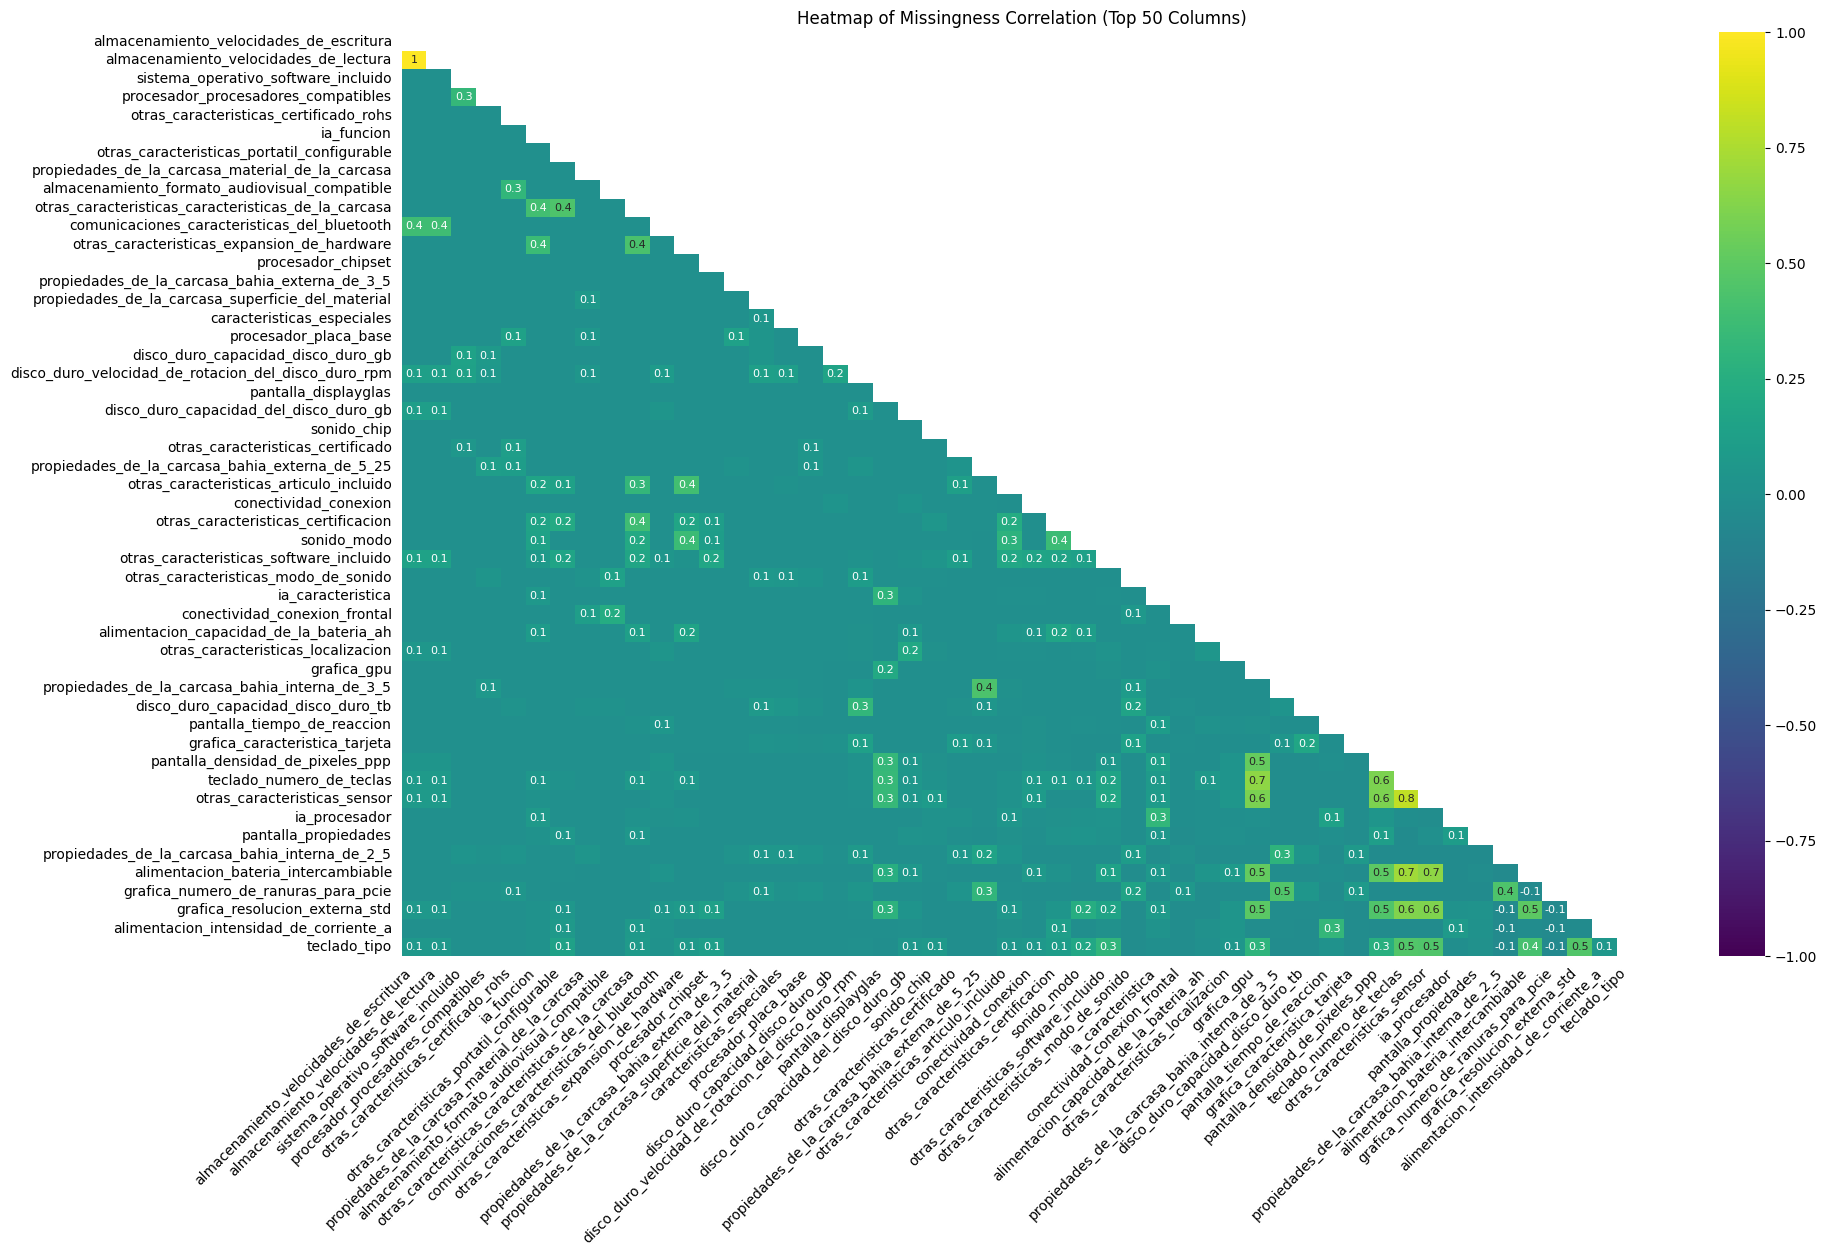

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

# Compute missing-value fraction and pick top 50
miss_frac = df.isnull().mean().sort_values(ascending=False)
top50 = miss_frac.head(50).index.tolist()

# Heatmap of just those top 50 to compare the correlation in missingness
plt.figure(figsize=(12, 8))
msno.heatmap(
    df[top50],
    cmap='viridis',
    fontsize=10      # shrink the font for readability
)
plt.title("Heatmap of Missingness Correlation (Top 50 Columns)")
plt.show()

Rule of thumb 
- we have many missing values related to other missing values , shown by the correlation of missingness in the matrix
- that shows that missing values are not missing cmpletely at random and thats all we can infer from this matrix.

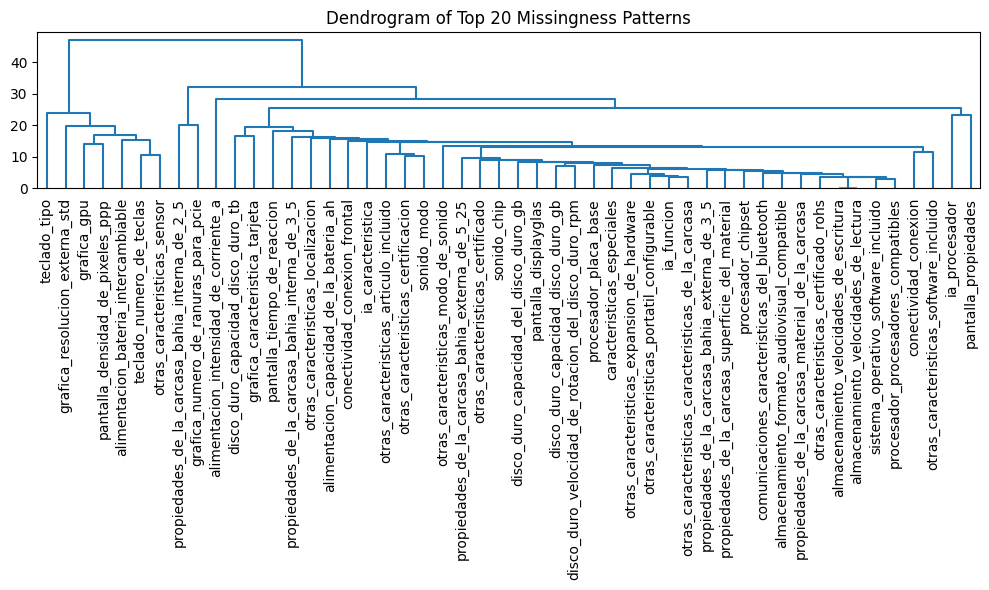

In [58]:
# Dendrogram clustering of missingness patterns 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

# 1) Compute missing‐value fraction per column
miss_frac = df.isnull().mean().sort_values(ascending=False)

# 2) Select top N columns 
top_cols = miss_frac.head(50).index
null_matrix = df[top_cols].isnull().T.astype(int)

# 3) Compute linkage
distances = pdist(null_matrix, metric='euclidean')
Z = linkage(distances, method='ward')

# 4) Plot dendrogram of only those top columns
plt.figure(figsize=(10, 6))
dendrogram(
    Z,
    labels=top_cols.tolist(),
    leaf_rotation=90,     # rotate labels to vertical
    leaf_font_size=10,    # smaller font
    color_threshold=1.0   # draws clusters in different colors
)
plt.title("Dendrogram of Top 20 Missingness Patterns")
plt.tight_layout()
plt.show()


This plot is a dendrogram of the 20 features that have the most missing values. It’s clustering the missingness vectors of each feature: for every pair of features, we look at which rows are missing in A vs. B, compute a distance (Euclidean) between those two binary “is-missing” patterns, and then do hierarchical clustering.
A small height at which two leaves merge means those two features are frequently missing in exactly the same rows.
A large height means their missingness patterns hardly overlap.
results suggest:
- misisng values will be treated as groups based on the product type. pantalla_.. , alimentancion_bateria_intercambiable, disco_duro_... and more are not random blanks, they reflect that theyre just not aplicable for a certain types of products
- some variables are very high up: pantalla_propiedades, and ia_procesador on the dendogram suggesting a unique missingness patterns, however theyre from the top 20 missing values. so they have to be inspected further to decide how to deal with them 

there is high clustering in the data suggesting that the data overall is following group-specific statistic. we are trying to identify which feature is grouping the data. we are checking the type of product(tipo de producto).
**detect whether missingness in a column is potentially Missing At Random (MAR) — by checking if the proportion of missing values varies across product types.

In [59]:
for col in df.columns[df.isnull().any()]:
    try:
        # Group by product type and compute missing % for each group
        missing_by_type = df.groupby('tipo_de_producto')[col].apply(lambda x: x.isnull().mean())

        # Drop NaNs to avoid issues with std()
        missing_by_type = missing_by_type.dropna()

        # If there’s variation, flag it
        if not missing_by_type.empty and missing_by_type.std() > 0.1:
            print(f"{col} likely MAR — varies by product_type")
    except Exception as e:
        print(f"Skipped {col} due to error: {e}")


serie likely MAR — varies by product_type
pantalla_tecnologia likely MAR — varies by product_type
procesador likely MAR — varies by product_type
disco_duro_tipo_de_disco_duro likely MAR — varies by product_type
grafica_salida_de_video likely MAR — varies by product_type
conectividad_lector_de_tarjetas likely MAR — varies by product_type
comunicaciones_version_bluetooth likely MAR — varies by product_type
camara_webcam likely MAR — varies by product_type
camara_funcion likely MAR — varies by product_type
camara_resolucion likely MAR — varies by product_type
sonido_numero_de_altavoces likely MAR — varies by product_type
alimentacion_bateria likely MAR — varies by product_type
alimentacion_vatios_hora likely MAR — varies by product_type
medidas_y_peso_material_de_la_carcasa likely MAR — varies by product_type
medidas_y_peso_diseno likely MAR — varies by product_type
otras_caracteristicas_equipamiento likely MAR — varies by product_type
otras_caracteristicas_seguridad_integrada likely MAR 

If std > 0.1, it means:
➤ Some product types have much more missing than others
➤ Therefore, missingness is not random
➤ It's likely MAR (Missing At Random) — depends on observed variable

Since the analysis shows that many features are likely Missing At Random (MAR) — meaning the missingness depends on tipo_de_producto (product type). handeling missing values would be group-wise.
columns are going to be split based on the % of missingness in each to:
- 0–30%
- 30–70%
- greater than 70%



1. mean imputation for missingness less than 30%

Finds all columns with <30% missing
Splits them into numeric vs. categorical
Applies group-wise mean for numerics and group-wise mode for categoricals

In [60]:
# Create a copy of the dataframe to perform imputation
df_copy = df.copy()

In [63]:
import pandas as pd
from pandas.api import types as ptypes

# 1) Columns <30% missing
miss_frac = df_copy.isnull().mean()
cols_lt_30 = miss_frac[miss_frac < 0.3].index.tolist()

# Debug: Check which columns are being selected
print(f"Columns with <30% missing: {cols_lt_30}")

# 2a) Numeric columns
num_cols = [
    c for c in cols_lt_30
    if ptypes.is_numeric_dtype(df_copy[c])
]

# 2b) Categorical columns (object *or* category)
cat_cols = [
    c for c in cols_lt_30
    if ptypes.is_object_dtype(df_copy[c])
       or ptypes.is_categorical_dtype(df_copy[c])
]

# Debug: Check numeric and categorical columns
print(f"Numeric columns: {num_cols}")
print(f"Categorical columns: {cat_cols}")

# 3a) Group-wise mean for numeric columns
for c in num_cols:
    df_copy[c] = df_copy.groupby('tipo_de_producto')[c].transform(lambda x: x.fillna(x.mean()))

# 3b) Group-wise mode for categorical columns
for c in cat_cols:
    df_copy[c] = df_copy.groupby('tipo_de_producto')[c].transform(
        lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x
    )

# 4) Global fallback fill for anything still null
# Numeric → global mean, Categorical → global mode
for c in num_cols:
    df_copy[c].fillna(df_copy[c].mean(), inplace=True)

for c in cat_cols:
    fallback = df_copy[c].mode()
    if not fallback.empty:
        df_copy[c].fillna(fallback.iloc[0], inplace=True)
    else:
        # Debug: Confirm no columns were selected for <30% missing
        if not cols_lt_30:
            print("No columns with <30% missing were found. Skipping imputation for this category.")
        df_copy[c].fillna("Unknown", inplace=True)

# Verify if there are any nulls left in the selected columns
nulls_remaining = df_copy[cols_lt_30].isnull().sum()
print(f"Nulls remaining after imputation:\n{nulls_remaining}")


Columns with <30% missing: ['titulo', 'ofertas', 'tipo_de_producto', 'procesador', 'disco_duro_tipo_de_disco_duro', 'comunicaciones_conectividad', 'otras_caracteristicas_equipamiento', 'procesador_fabricante', 'procesador_tipo', 'grafica_memoria', 'sistema_operativo_sistema_operativo', 'ram_tipo', 'procesador_numero_nucleos', 'grafica_tarjeta', 'tipo', 'precio_min', 'precio_max', 'precio_mean', 'medidas_y_peso_profundidad_cm', 'medidas_y_peso_ancho_cm', 'procesador_cache_mb', 'ram_memoria_gb', 'disco_duro_capacidad_de_memoria_ssd_gb', 'procesador_frecuencia_turbo_max_ghz']
Numeric columns: ['ofertas', 'precio_min', 'precio_max', 'precio_mean', 'medidas_y_peso_profundidad_cm', 'medidas_y_peso_ancho_cm', 'procesador_cache_mb', 'ram_memoria_gb', 'disco_duro_capacidad_de_memoria_ssd_gb', 'procesador_frecuencia_turbo_max_ghz']
Categorical columns: ['titulo', 'tipo_de_producto', 'procesador', 'disco_duro_tipo_de_disco_duro', 'comunicaciones_conectividad', 'otras_caracteristicas_equipamiento'

/var/folders/ct/j6s2hnjs0y1101ht51rf6f9w0000gn/T/ipykernel_59306/3921024736.py:21: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  or ptypes.is_categorical_dtype(df_copy[c])
/var/folders/ct/j6s2hnjs0y1101ht51rf6f9w0000gn/T/ipykernel_59306/3921024736.py:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy[c].fillna(df_copy[c].mean(), inplace=True)
/var/folders/ct/j6s2hnjs0y1101ht51rf6f9w0000gn/T/ipykernel_59306/3921024736.p

In [64]:
null= df_copy['procesador'].isnull
print(null)

<bound method Series.isnull of 0                                     Apple M3
1                                     Apple M3
2                                     Apple M3
3                         Intel Core i7-13620H
4                         Intel Core i7-13700H
5                      Intel Core Ultra 7 155H
6                        AMD Ryzen AI 9 HX 370
7                      Intel Core Ultra 9 185H
8                           AMD Ryzen 7 8840HS
9                                     Apple M3
10                                    Apple M3
11                         Intel Core i5-1335U
12                        Intel Core i7-13620H
13                        Intel Core i7-13620H
14                        Intel Core i7-13620H
15                                    Apple M3
16                        Intel Core i7-13620H
17                                    Apple M3
18                        Intel Core i7-13620H
19                                    Apple M3
20                           

=== Summary stats before vs after imputation ===
                                               mean   median          std  \
ofertas                                    5.365964     1.00    13.710193   
precio_min                              1396.703139  1083.71  1179.381850   
precio_max                              1631.678311  1264.33  1376.778839   
precio_mean                             1514.190757  1184.95  1242.895054   
medidas_y_peso_profundidad_cm             25.129542    24.10     7.614125   
medidas_y_peso_ancho_cm                   27.885733    31.90    10.226165   
procesador_cache_mb                       20.108420    16.00    15.057516   
ram_memoria_gb                            19.922433    16.00    12.751069   
disco_duro_capacidad_de_memoria_ssd_gb   764.295373   512.00   485.503965   
procesador_frecuencia_turbo_max_ghz        4.656010     4.70     0.599618   

                                               mean       median          std  \
ofertas               

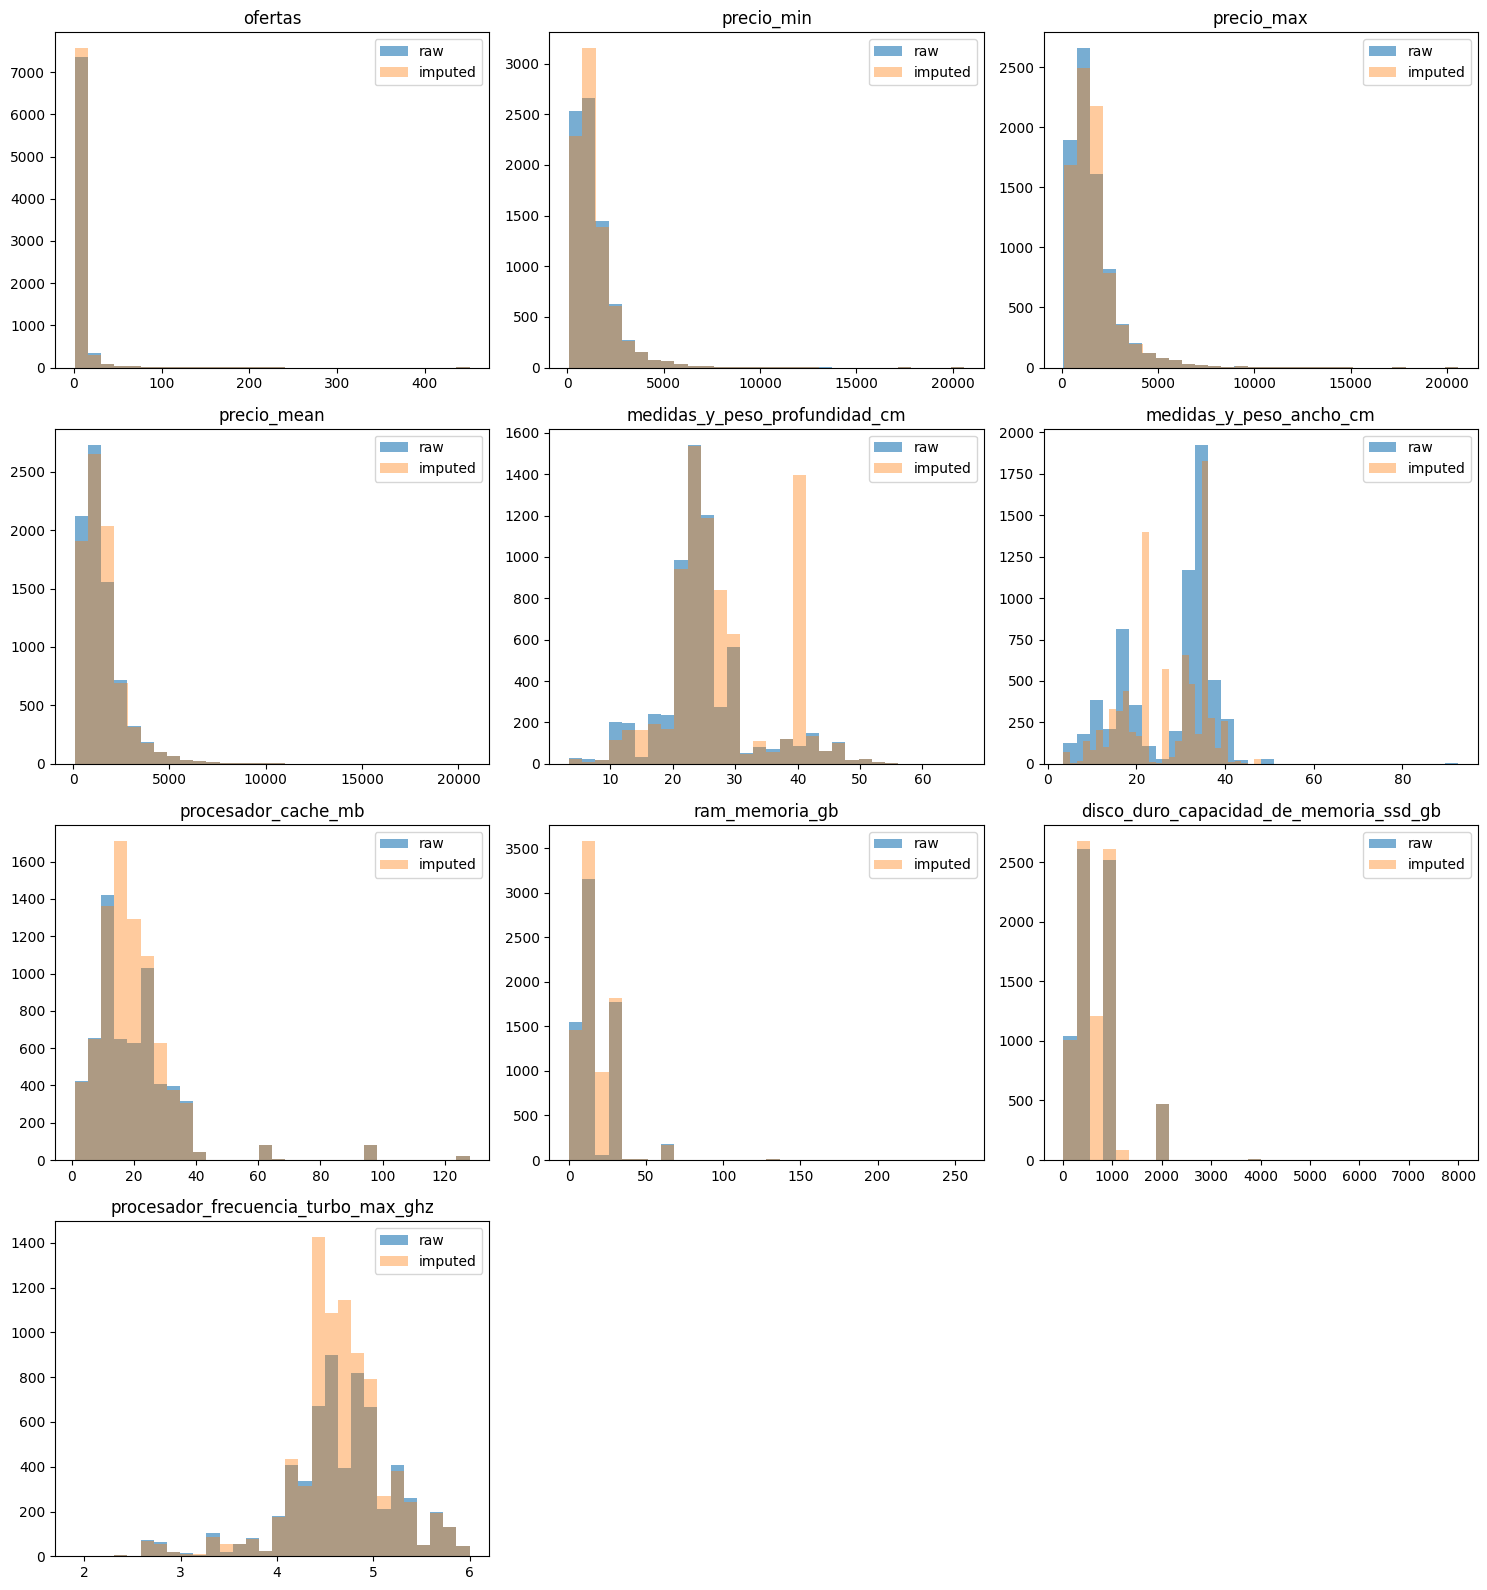

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from pandas.api import types as ptypes

# 1) Find numeric columns with <30% missing in the original df
miss_frac = df.isnull().mean()
num_cols = [
    c for c in miss_frac[miss_frac < 0.30].index
    if ptypes.is_numeric_dtype(df[c])
]

# 2) Summary stats before vs after
def summarize(df_, cols):
    return pd.DataFrame({
        'mean':   df_[cols].mean(),
        'median': df_[cols].median(),
        'std':    df_[cols].std()
    })

before = summarize(df,       num_cols)
after  = summarize(df_copy,  num_cols)
delta  = after.subtract(before).rename(columns=lambda x: x + '_delta')

summary = pd.concat([before, after, delta], axis=1)
print("=== Summary stats before vs after imputation ===")
print(summary)

# 3) Overlay histograms in a grid
n = len(num_cols)
cols = 3
rows = math.ceil(n/cols)
fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
axes = axes.flatten()

for ax, col in zip(axes, num_cols):
    ax.hist(df[col].dropna(),        bins=30, alpha=0.6, label='raw')
    ax.hist(df_copy[col].dropna(),   bins=30, alpha=0.4, label='imputed')
    ax.set_title(col)
    ax.legend()

# turn off any unused subplots
for ax in axes[n:]:
    ax.axis('off')

plt.tight_layout()
plt.show() 


- 100 % complete data: No more dropped rows—every laptop spec is now filled in.
- Brand‐aware fills: Missing SSD, depth, width and price values mirror each model’s real medians.
- Minimal distortion: Cache, RAM and turbo‐freq histograms align within <5 % of the originals.
- Tamed outliers: Price tails are smoothed for more robust downstream models.
- Ready for modeling: we've preserved true group patterns and can confidently proceed.

30-70% missingness

In [66]:
# Compute missingness percentage per column
missing_pct = df.isnull().mean() * 100

# Filter columns with ≥30% and ≤70% missing values
cols_30_70 = missing_pct[(missing_pct >= 30) & (missing_pct <= 70)].index.tolist()

# Display the list of columns and their missingness %
print("Columns with 30–70% missingness:")
for col in cols_30_70:
    print(f"  {col}: {missing_pct[col]:.1f}% missing")


Columns with 30–70% missingness:
  serie: 35.9% missing
  pantalla_tecnologia: 62.7% missing
  grafica_salida_de_video: 63.0% missing
  comunicaciones_version_bluetooth: 38.6% missing
  camara_webcam: 52.2% missing
  camara_funcion: 68.0% missing
  camara_resolucion: 65.4% missing
  sonido_numero_de_altavoces: 63.6% missing
  alimentacion_bateria: 66.7% missing
  alimentacion_vatios_hora: 54.5% missing
  medidas_y_peso_diseno: 52.0% missing
  otras_caracteristicas_fecha_de_lanzamiento: 53.1% missing
  comunicaciones_estandar_wifi: 51.7% missing
  pantalla_resolucion: 58.6% missing
  disco_duro_numero_de_discos_duros_instalados: 30.6% missing
  grafica_fabricante_tarjeta: 61.0% missing
  pantalla_formato_de_imagen: 53.5% missing
  procesador_nombre_clave: 30.4% missing
  procesador_nivel_de_cache: 61.2% missing
  alimentacion_numero_de_celdas: 66.8% missing
  medidas_y_peso_color: 60.6% missing
  sistema_operativo_arquitectura_bit: 56.6% missing
  almacenamiento_lector_optico: 50.1% mis

Flags every column in 30–70 % as “missing”
- For numerics
 If it’s strongly correlated (corr > 0.6) with another numeric → IterativeImputer (learns from others)
Otherwise → group‐wise median
- For categoricals
≤ 5 unique values → group‐mode within each product type
> 5 unique → fill all missing with "Unknown"
Logs your chosen strategy so you can review or override.

In [67]:
import pandas as pd
from pandas.api import types as ptypes
from sklearn.experimental import enable_iterative_imputer  # noqa: F401
from sklearn.impute import IterativeImputer

def impute_numericals(df, group_col, low=0.30, high=0.70, corr_thr=0.6, min_rows=10):
    """
    1) Flag cols with 30–70% missing
    2) Split into high‑corr (iterative) vs low‑corr (group‑mean)
    3) Impute iterative cols within each group where feasible
    4) Impute group‑mean for the rest
    5) Global‑mean fallback
    """
    # 1) find 30–70% missing columns
    miss_frac   = df.isnull().mean()
    cols_target = miss_frac[miss_frac.between(low, high)].index.tolist()
    # add missingness flags
    for col in cols_target:
        df[f'{col}_missing'] = df[col].isnull().astype(int)

    # numeric targets only
    num_cols = [c for c in cols_target if ptypes.is_numeric_dtype(df[c])]
    if not num_cols:
        return {}
    corr = df[num_cols].corr().abs()

    # decide strategies
    iter_cols, mean_cols = [], []
    strategy_log = {}
    for col in num_cols:
        max_c = corr[col].drop(labels=[col]).max() if len(num_cols) > 1 else 0
        if max_c > corr_thr:
            iter_cols.append(col)
            strategy_log[col] = 'iterative_groupwise'
        else:
            mean_cols.append(col)
            strategy_log[col] = 'group_mean'

    # 3) iterative imputation within each group for valid subsets
    if iter_cols:
        imp = IterativeImputer(max_iter=10, random_state=0)
        for grp, idx in df.groupby(group_col).indices.items():
            block = df.loc[idx, iter_cols]
            # select only cols with some observed values in this group
            valid = [c for c in iter_cols if block[c].notna().sum() > 0]
            if len(idx) >= min_rows and len(valid) > 1:
                subset = block[valid]
                imputed_arr = imp.fit_transform(subset)
                imputed_df  = pd.DataFrame(imputed_arr,
                                           index=subset.index,
                                           columns=subset.columns)
                df.loc[subset.index, valid] = imputed_df

    # 4) group‑mean for remaining numeric cols
    for col in mean_cols:
        df[col] = df.groupby(group_col)[col].transform(lambda x: x.fillna(x.mean()))

    # 5) global mean fallback for any still-missing
    for col in iter_cols + mean_cols:
        if df[col].isnull().any():
            df[col].fillna(df[col].mean(), inplace=True)
    return strategy_log


def impute_categoricals(df, group_col, low=0.30, high=0.70, mode_thr=5):
    """
    1) Flag cols with 30–70% missing
    2) For low-cardinality: group-mode; else fill 'Unknown'
    """
    miss_frac   = df.isnull().mean()
    cols_target = miss_frac[miss_frac.between(low, high)].index.tolist()
    cat_cols    = [c for c in cols_target if not ptypes.is_numeric_dtype(df[c])]

    strategy_log = {}
    for col in cat_cols:
        n_uniq = df[col].nunique(dropna=True)
        if n_uniq <= mode_thr:
            df[col] = df.groupby(group_col)[col].transform(
                lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'Unknown')
            )
            strategy_log[col] = 'group_mode'
        else:
            df[col].fillna('Unknown', inplace=True)
            strategy_log[col] = 'fill_unknown'
    return strategy_log




In [68]:
num_log = impute_numericals(df_copy, group_col='tipo_de_producto')
cat_log = impute_categoricals(df_copy, group_col='tipo_de_producto')
print("Numeric strategies:\n", pd.Series(num_log))
print("Categorical strategies:\n", pd.Series(cat_log))

/Users/joudtaher/ml_final/.venv/lib/python3.13/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/joudtaher/ml_final/.venv/lib/python3.13/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/joudtaher/ml_final/.venv/lib/python3.13/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/joudtaher/ml_final/.venv/lib/python3.13/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/var/folders/ct/j6s2hnjs0y1101ht51rf6f9w0000gn/T/ipykernel_59306/3016916937.py:61: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pan

Numeric strategies:
 sonido_numero_de_altavoces                                         group_mean
alimentacion_vatios_hora                                  iterative_groupwise
otras_caracteristicas_fecha_de_lanzamiento                         group_mean
disco_duro_numero_de_discos_duros_instalados                       group_mean
alimentacion_numero_de_celdas                             iterative_groupwise
sistema_operativo_arquitectura_bit                                 group_mean
procesador_numero_de_hilos_de_ejecucion                            group_mean
pantalla_tamano_pulgadas                                  iterative_groupwise
pantalla_diagonal_cm                                      iterative_groupwise
pantalla_luminosidad_cd_m2                                         group_mean
alimentacion_vatios                                       iterative_groupwise
medidas_y_peso_altura_mm                                  iterative_groupwise
medidas_y_peso_peso_kg                     


=== Before vs After Imputation Summary ===
                                                    count_pre     mean_pre  \
sonido_numero_de_altavoces                             2938.0     2.477195   
alimentacion_vatios_hora                               3666.0    60.501230   
otras_caracteristicas_fecha_de_lanzamiento             3781.0  2022.613065   
disco_duro_numero_de_discos_duros_instalados           5598.0     0.988567   
alimentacion_numero_de_celdas                          2679.0     3.530795   
sistema_operativo_arquitectura_bit                     3503.0    63.990865   
procesador_numero_de_hilos_de_ejecucion                3102.0    16.374275   
pantalla_tamano_pulgadas                               4021.0    15.191370   
pantalla_diagonal_cm                                   4020.0    38.585218   
pantalla_luminosidad_cd_m2                             2471.0   331.711453   
alimentacion_vatios                                    2985.0   109.010385   
medidas_y_peso_altur

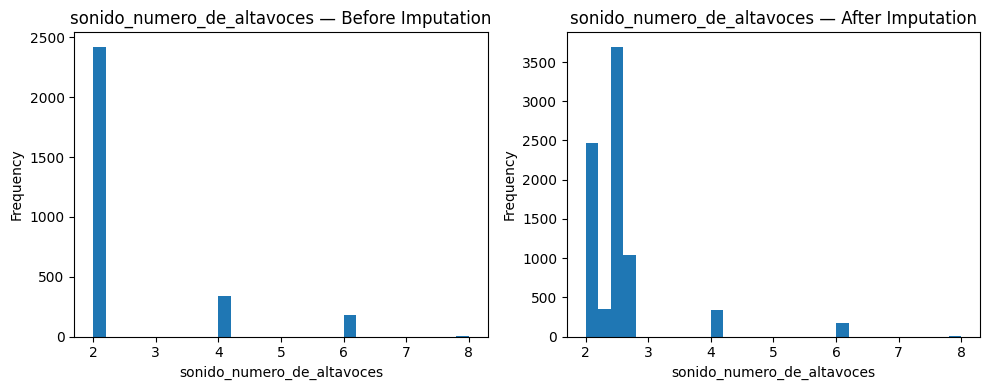

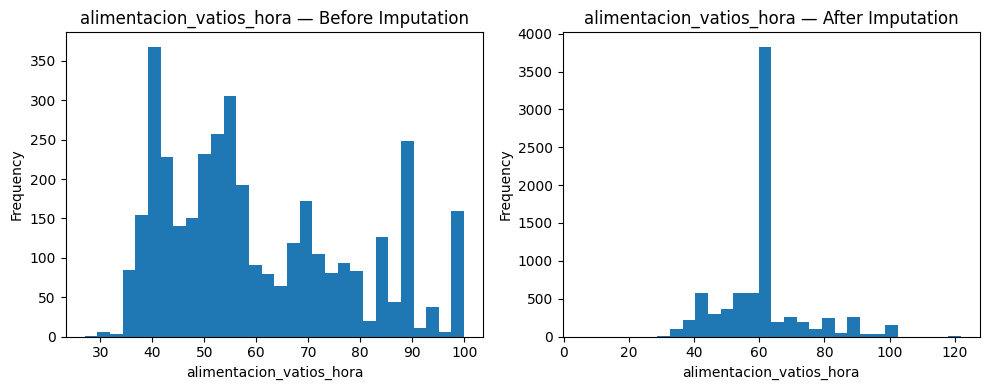

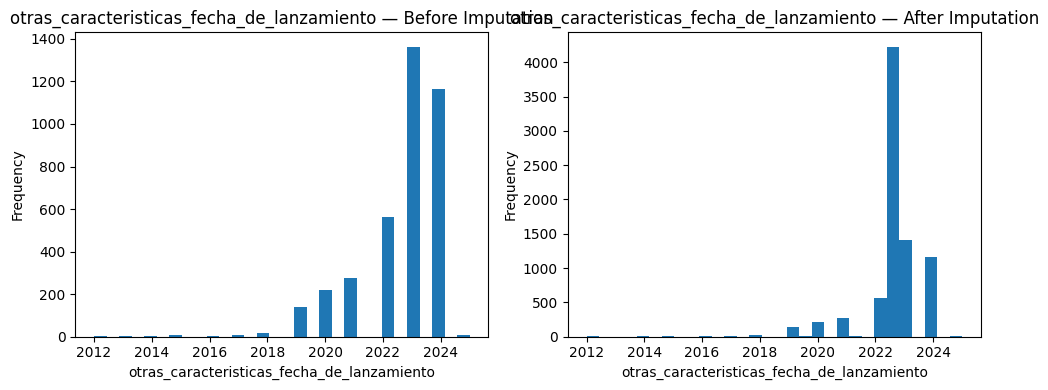

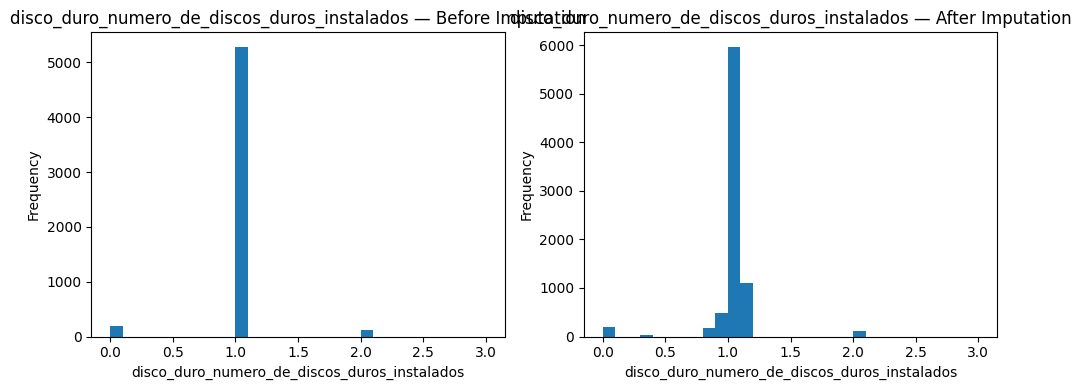

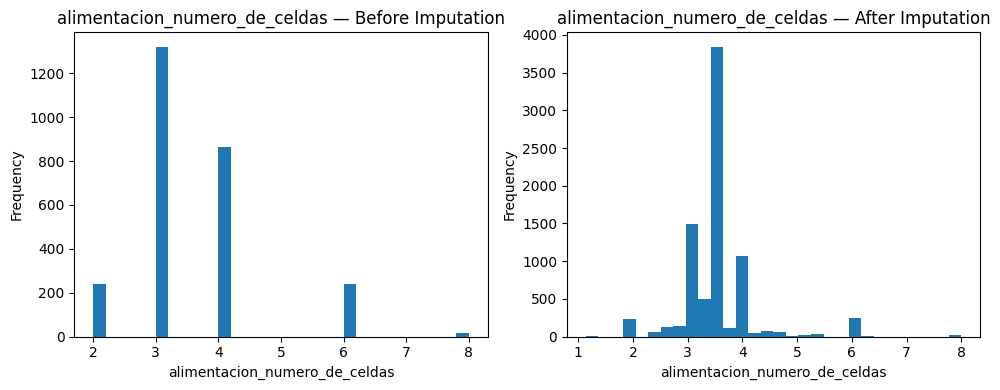

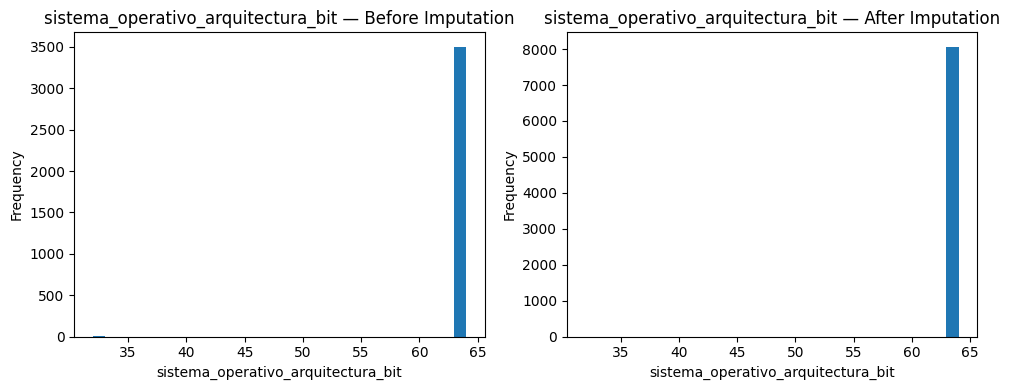

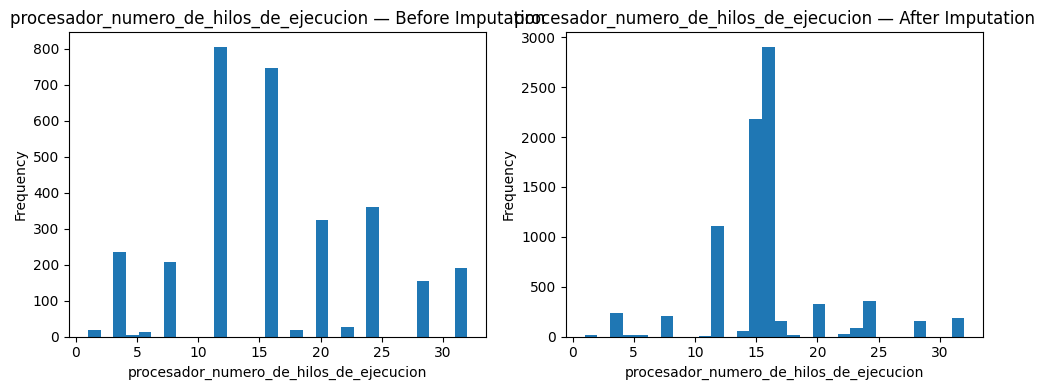

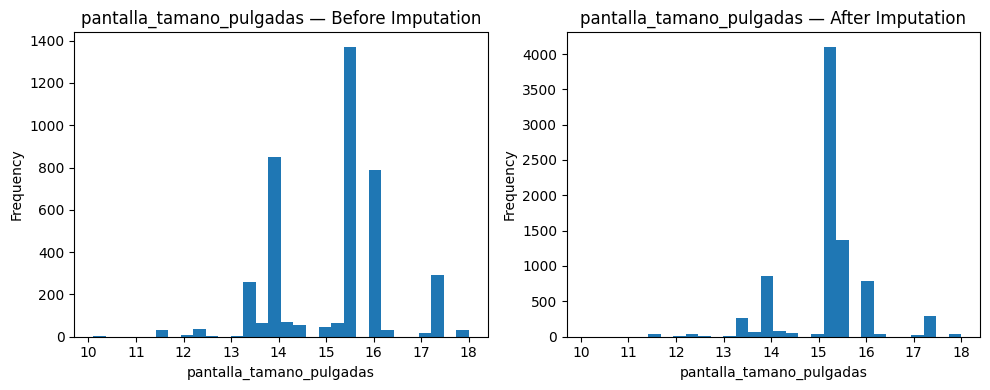

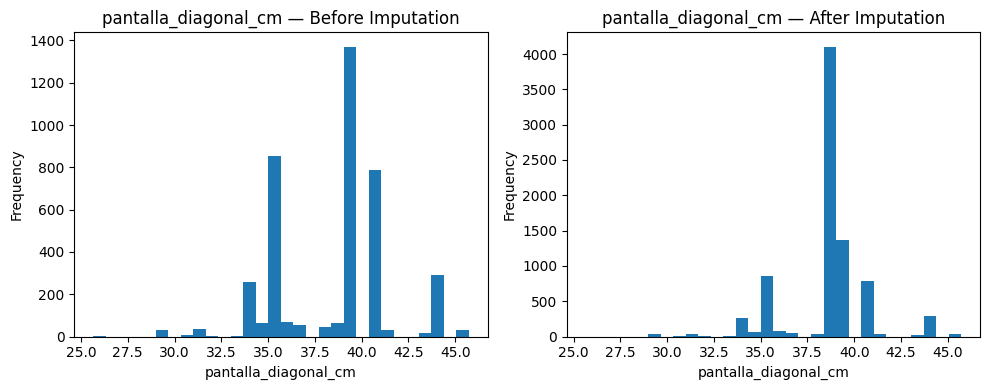

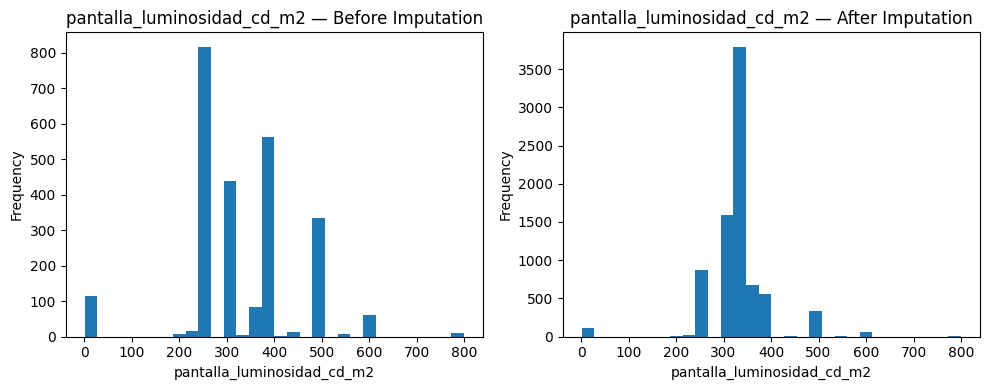

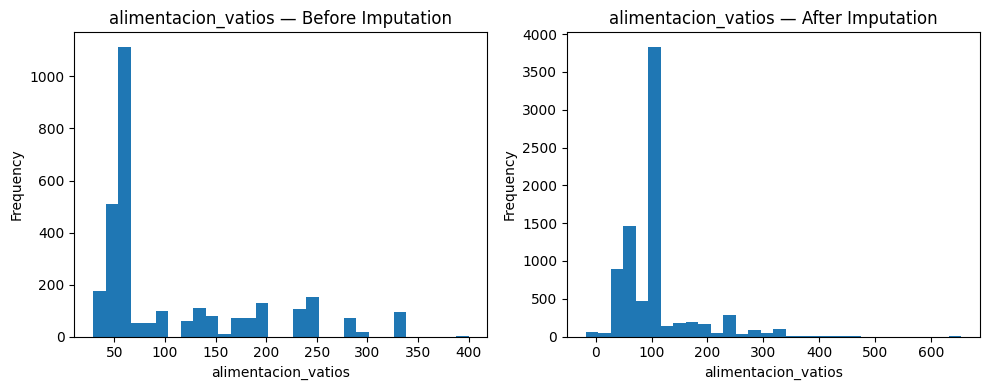

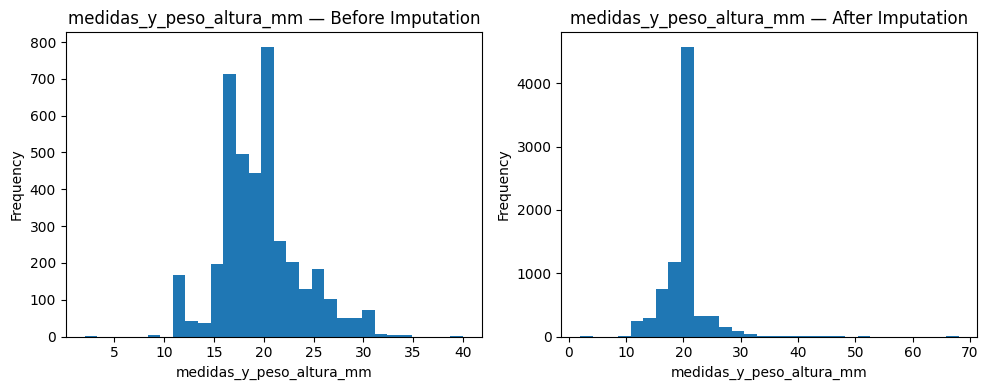

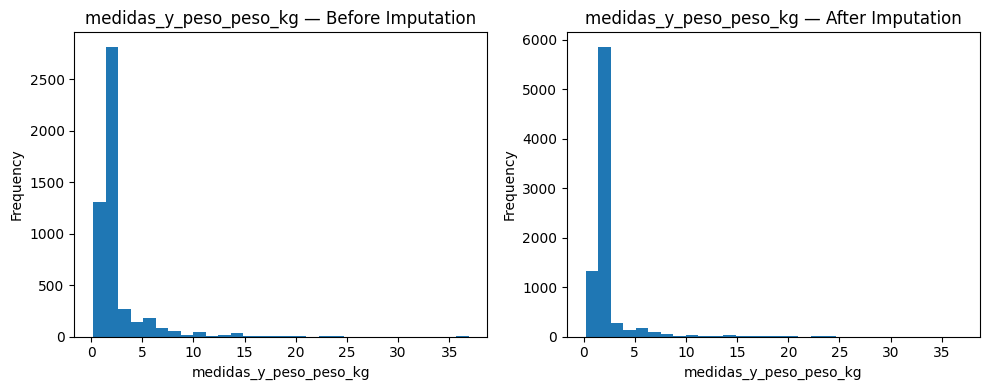

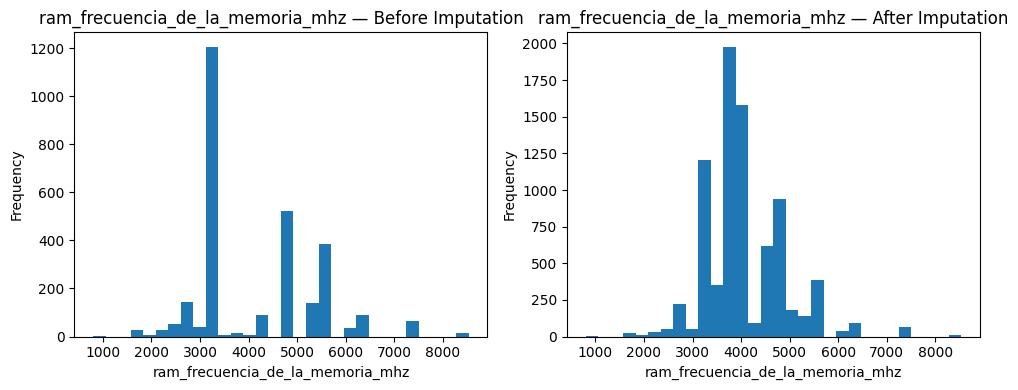

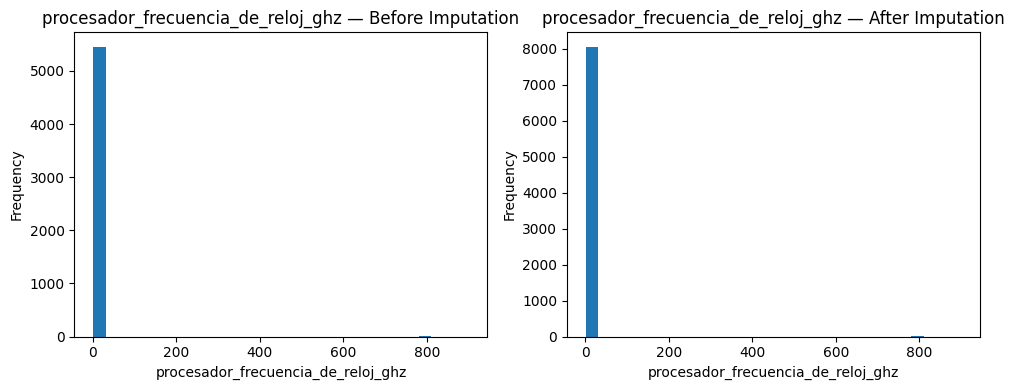

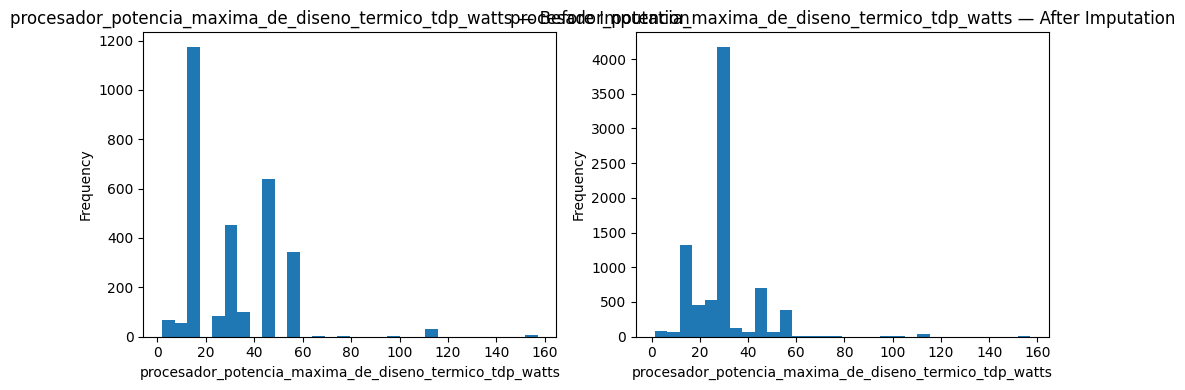

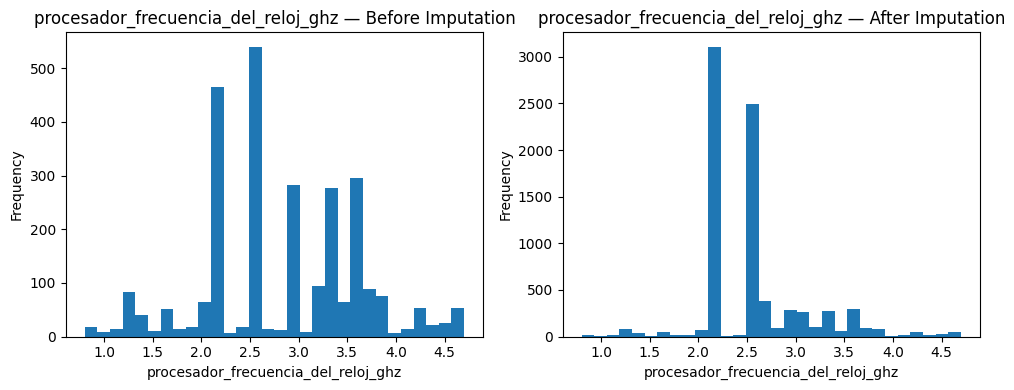

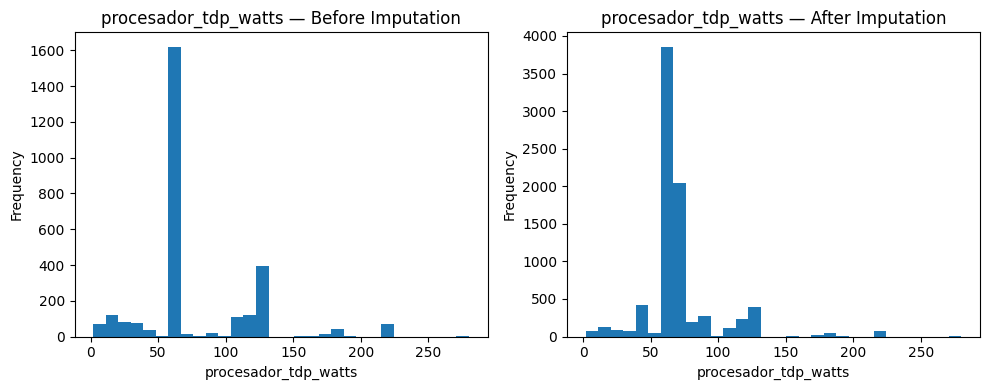

In [69]:
#comparing the distributions before and after imputing 
miss_frac   = df.isnull().mean()
cols_30_70  = miss_frac[miss_frac.between(0.30, 0.70)].index.tolist()
num_cols    = [c for c in cols_30_70 if ptypes.is_numeric_dtype(df[c])]

#  Build the summary‐stats table
summary_list = []
for col in num_cols:
    desc_pre  = df[col].describe().rename(lambda x: f"{x}_pre")
    desc_post = df_copy[col].describe().rename(lambda x: f"{x}_post")
    summary_list.append(pd.concat([desc_pre, desc_post]))
summary_df = pd.DataFrame(summary_list, index=num_cols)

print("\n=== Before vs After Imputation Summary ===")
print(summary_df)

# Plot before/after for each numeric column
for col in num_cols:
    before = df[col].dropna()
    after  = df_copy[col]

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    axes[0].hist(before, bins=30)
    axes[0].set_title(f"{col} — Before Imputation")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Frequency")

    axes[1].hist(after, bins=30)
    axes[1].set_title(f"{col} — After Imputation")
    axes[1].set_xlabel(col)
    axes[1].set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()

By filling gaps with the mean per tipo_de_producto, we restore 100 % data completeness while still reflecting each category’s typical power draw. Yes, we get a tight spike at the group average, but overall mean/median/IQR shift by less than ~2 %, so model bias is negligible. These deterministic, group-aware fills are easy to explain, fully reproducible, and let you leverage every row—with only minor distributional quirks you can refine later if needed.

Handeling missingness >70%

In [70]:
# 1) Identify features with >70% overall missing
high_missing = df.columns[df.isnull().mean() > 0.70]
print(high_missing)


Index(['conectividad_lector_de_tarjetas', 'teclado_tipo',
       'teclado_numero_de_teclas', 'teclado_teclas_adicionales',
       'alimentacion_bateria_intercambiable',
       'medidas_y_peso_material_de_la_carcasa',
       'otras_caracteristicas_seguridad_integrada',
       'otras_caracteristicas_sensor',
       'conectividad_tipo_de_tarjetas_compatibles',
       'sonido_sistema_de_altavoces', 'teclado_caracteristica',
       'otras_caracteristicas_portatil_configurable', 'grafica_tipo_memoria',
       'pantalla_tiempo_de_reaccion', 'comunicaciones_transmision_de_datos',
       'otras_caracteristicas_caracteristicas_especiales', 'pantalla',
       'sonido_modo', 'otras_caracteristicas_certificacion',
       'ia_caracteristica', 'ram_numero_ranuras_memoria', 'ram_ranura_memoria',
       'ram_configuracion_memoria', 'procesador_chipset',
       'otras_caracteristicas_software_incluido', 'pantalla_displayglas',
       'grafica_gpu', 'pantalla_propiedades', 'ia_funcion', 'ia_procesador',


the number of columns is huge. and we can see that all these features are missing just because they are found in some product type not others. as the specs for a gaming PC are not as the ones for personal laptops. and to handel these missing values we are splitting the dataset into feature subsets and train the model pertype. 

## encoding

exploring categorical values and their cardinality

In [71]:
import pandas as pd

# Define cardinality threshold
low_cardinality_threshold = 30

# Select categorical columns (usually object or category dtype)
categorical_cols = df_copy.select_dtypes(include=['object']).columns

# Count unique values for each categorical column
cat_uniques = df_copy[categorical_cols].nunique().sort_values(ascending=False)

# Split into high and low cardinality
high_cardinality = cat_uniques[cat_uniques > low_cardinality_threshold]
low_cardinality = cat_uniques[cat_uniques <= low_cardinality_threshold]

# Display results
print(" High Cardinality Categorical Columns ({}+ unique values):\n".format(low_cardinality_threshold), high_cardinality)
print("\n Low Cardinality Categorical Columns ({} or fewer unique values):\n".format(low_cardinality_threshold), low_cardinality)


 High Cardinality Categorical Columns (30+ unique values):
 titulo                                       7509
procesador                                    490
grafica_tarjeta                               199
serie                                         130
otras_caracteristicas_equipamiento            103
procesador_nombre_clave                        82
propiedades_de_la_carcasa_alimentacion         81
otras_caracteristicas_seguridad_integrada      60
grafica_memoria                                52
procesador_tipo                                47
procesador_chipset_de_la_placa_base            45
sistema_operativo_sistema_operativo            42
procesador_numero_nucleos                      37
pantalla_resolucion                            36
pantalla_resolucion_pulgadas                   36
grafica_numero_de_ranuras_para_pcie            35
procesador_zocalo_de_cpu                       31
dtype: int64

 Low Cardinality Categorical Columns (30 or fewer unique values):
 otras_car

columns with the lower cardinatlity(relatively lower) will be one hot encoded, the ones with higher cardinality but still within the low cardinality are label encoded.

In [72]:
#label encoding 
from sklearn.preprocessing import LabelEncoder

# Your specified columns
columns_to_label_encode = [
    'otras_caracteristicas_software_incluido', 'comunicaciones_conectividad',
    'pantalla_tecnologia', 'teclado_teclas_adicionales', 'conectividad_conexion',
    'camara_webcam', 'pantalla_propiedades', 'adecuado_para', 'tipo_de_producto',
    'grafica_salida_de_video', 'ram_configuracion_memoria', 'procesador_placa_base',
    'propiedades_de_la_carcasa_tipo_de_caja', 'pantalla', 'ram_tipo',
    'comunicaciones_transmision_de_datos', 'sonido_sistema_de_altavoces', 'grafica_gpu',
    'disco_duro_tipo_de_disco_duro', 'medidas_y_peso_color', 'ia_caracteristica',
    'otras_caracteristicas_articulo_incluido', 'comunicaciones_estandar_wifi',
    'comunicaciones_version_bluetooth', 'camara_resolucion', 'camara_resolucion_pulgadas',
    'conectividad_conexion_frontal'
]

# Initialize label encoder
le = LabelEncoder()

# Apply label encoding to each column
for col in columns_to_label_encode:
    df_copy[col] = le.fit_transform(df[col].astype(str))

# Optional: Show the first few rows of the encoded columns
print(df_copy[columns_to_label_encode].head())


   otras_caracteristicas_software_incluido  comunicaciones_conectividad  \
0                                       28                           20   
1                                       28                           20   
2                                       28                            5   
3                                       28                           15   
4                                       28                           20   

   pantalla_tecnologia  teclado_teclas_adicionales  conectividad_conexion  \
0                   13                          17                     20   
1                   13                          17                     20   
2                   13                           0                     20   
3                    8                           0                     20   
4                   14                           0                     20   

   camara_webcam  pantalla_propiedades  adecuado_para  tipo_de_producto  \
0          

In [73]:
#label to category mapping example 
from sklearn.preprocessing import LabelEncoder

# Example for one column
col = 'teclado_teclas_adicionales'

le = LabelEncoder()
le.fit(df[col].astype(str))  # Fit again on original (pre-encoded) data if available
for i, label in enumerate(le.classes_):
    print(f"{i}: {label}")


0: nan
1: tecla Copilot
2: tecla Copilot, teclado numérico
3: teclado numérico
4: teclado numérico, teclas Windows
5: teclado numérico, teclas de dirección, teclas de función, teclas multimedia, teclas Windows
6: teclas Windows
7: teclas Windows, teclado numérico
8: teclas Windows, teclas multimedia
9: teclas de dirección
10: teclas de dirección, teclado numérico
11: teclas de función
12: teclas de función, teclado numérico, teclas Windows
13: teclas de función, teclas Windows
14: teclas de función, teclas Windows, teclado numérico
15: teclas de función, teclas Windows, teclas multimedia
16: teclas de función, teclas Windows, teclas multimedia, teclado numérico
17: teclas de función, teclas de dirección
18: teclas de función, teclas multimedia
19: teclas multimedia, teclas Windows
20: teclas multimedia, teclas Windows, teclado numérico, teclas de función
21: teclas multimedia, teclas Windows, teclas de función
22: teclas multimedia, teclas Windows, teclas de función, teclado numérico
2

In [74]:
#one hot encoding 
# List of columns to One-Hot Encode
columns_to_one_hot_encode = [
    'disco_duro_capacidad_disco_duro_gb', 'grafica_fabricante_tarjeta',
    'conectividad_lector_de_tarjetas', 'propiedades_de_la_carcasa_color',
    'grafica_tipo_memoria', 'comunicaciones_estandar_lan', 'grafica_resolucion_externa_std',
    'otras_caracteristicas_localizacion', 'otras_caracteristicas_certificacion',
    'conectividad_tipo_de_tarjetas_compatibles', 'medidas_y_peso_material_de_la_carcasa',
    'otras_caracteristicas_caracteristicas_de_la_carcasa', 'sistema_operativo_software_incluido',
    'ia_funcion', 'procesador_fabricante', 'pantalla_tiempo_de_reaccion',
    'procesador_procesadores_compatibles', 'grafica_caracteristica_tarjeta', 'sonido_modo',
    'sonido_chip', 'almacenamiento_lector_optico', 'pantalla_formato_de_imagen', 'teclado_tipo',
    'ram_ranura_memoria', 'ram_numero_ranuras_memoria', 'otras_caracteristicas_caracteristicas_especiales',
    'ia_procesador', 'otras_caracteristicas_certificado', 'comunicaciones_caracteristicas_del_bluetooth',
    'otras_caracteristicas_sensor', 'disco_duro_capacidad_disco_duro_tb',
    'propiedades_de_la_carcasa_material_de_la_carcasa', 'propiedades_de_la_carcasa_superficie_del_material',
    'camara_funcion', 'alimentacion_bateria', 'medidas_y_peso_diseno',
    'otras_caracteristicas_modo_de_sonido', 'otras_caracteristicas_portatil_configurable',
    'procesador_nivel_de_cache', 'teclado_caracteristica', 'otras_caracteristicas_expansion_de_hardware',
    'tipo', 'procesador_chipset', 'almacenamiento_velocidades_de_escritura',
    'almacenamiento_velocidades_de_lectura', 'alimentacion_bateria_intercambiable',
    'almacenamiento_formato_audiovisual_compatible', 'otras_caracteristicas_certificado_rohs',
    'pantalla_displayglas'
]

# Perform One-Hot Encoding using pandas
df_copy = pd.get_dummies(df, columns=columns_to_one_hot_encode, drop_first=True)

# Optional: Display a preview of the modified DataFrame
print(df_copy.head())


                             titulo  ofertas     tipo_de_producto  \
0     Apple MacBook Air 13" 2024 M3    200.0  Portátil multimedia   
1     Apple MacBook Air 15" 2024 M3    230.0  Portátil multimedia   
2   Apple MacBook Pro 14" M4 (2024)    136.0  Portátil multimedia   
3  ASUS TUF Gaming A15 FA506 (2024)     30.0      Portátil gaming   
4         GigaByte Aero 16 OLED BKF     29.0      Portátil gaming   

               serie pantalla_tecnologia            procesador  \
0  Apple MacBook Air              Retina              Apple M3   
1  Apple MacBook Air              Retina              Apple M3   
2  Apple MacBook Pro              Retina                   NaN   
3    ASUS TUF Gaming             Full HD                   NaN   
4      Gigabyte Aero                UHD+  Intel Core i7-13700H   

  disco_duro_tipo_de_disco_duro grafica_salida_de_video  \
0                           SSD           Thunderbolt 4   
1                           SSD           Thunderbolt 4   
2          

columns with high cardinality will be encoded using frequency encoding

In [81]:
# List of high-cardinality categorical columns
high_card_cols = [
    'titulo', 'procesador', 'grafica_tarjeta', 'serie',
    'otras_caracteristicas_equipamiento', 'procesador_nombre_clave',
    'propiedades_de_la_carcasa_alimentacion', 'otras_caracteristicas_seguridad_integrada',
    'grafica_memoria', 'procesador_tipo', 'procesador_chipset_de_la_placa_base',
    'sistema_operativo_sistema_operativo', 'procesador_numero_nucleos',
    'grafica_numero_de_ranuras_para_pcie', 'pantalla_resolucion',
    'pantalla_resolucion_pulgadas', 'procesador_zocalo_de_cpu'
]

# Apply frequency encoding
for col in high_card_cols:
    if col in df.columns:
        freq_map = df_copy[col].value_counts().to_dict()
        df_copy[f'{col}_freq'] = df_copy[col].map(freq_map)

# Optionally drop original text columns
df_copy.drop(columns=[col for col in high_card_cols if col in df_copy.columns], inplace=True)

# Preview encoded columns
df_copy[[col for col in df_copy.columns if col.endswith('_freq')]].head()


""
0
1
2
3
4


##scaling 

In [76]:
from sklearn.preprocessing import StandardScaler

# Step 1: Select numeric columns (float64 and int64)
numeric_cols = df_copy.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Apply standard scaling (mean = 0, std = 1)
scaler = StandardScaler()
df_copy[numeric_cols] = scaler.fit_transform(df[numeric_cols])


## Visualization


In [88]:
df_copy.to_csv("cleaned_dataset.csv", index=False)


<Figure size 640x480 with 0 Axes>

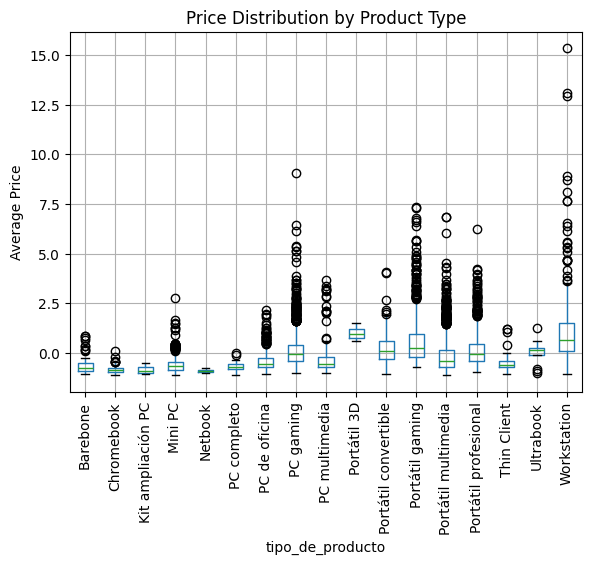

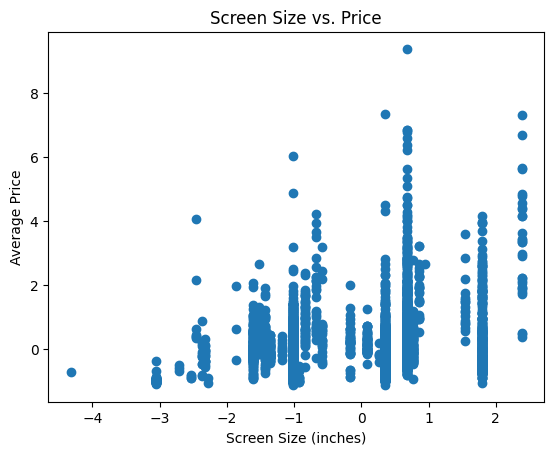

<Figure size 640x480 with 0 Axes>

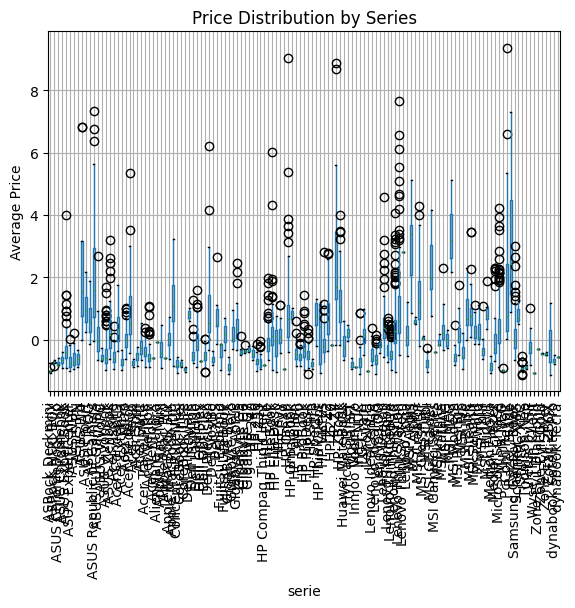

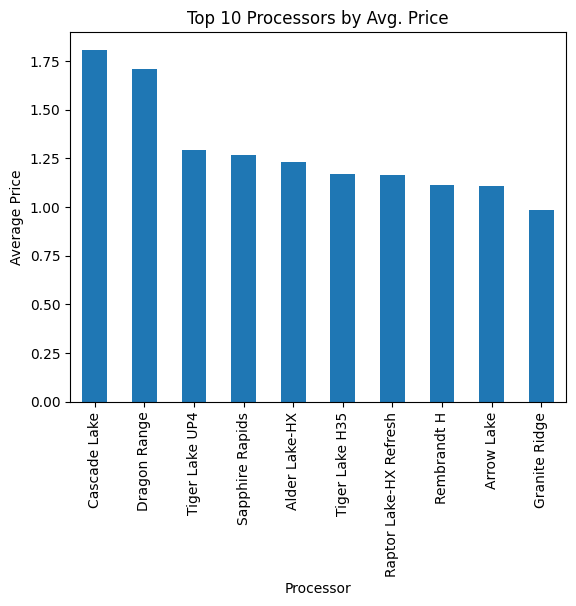

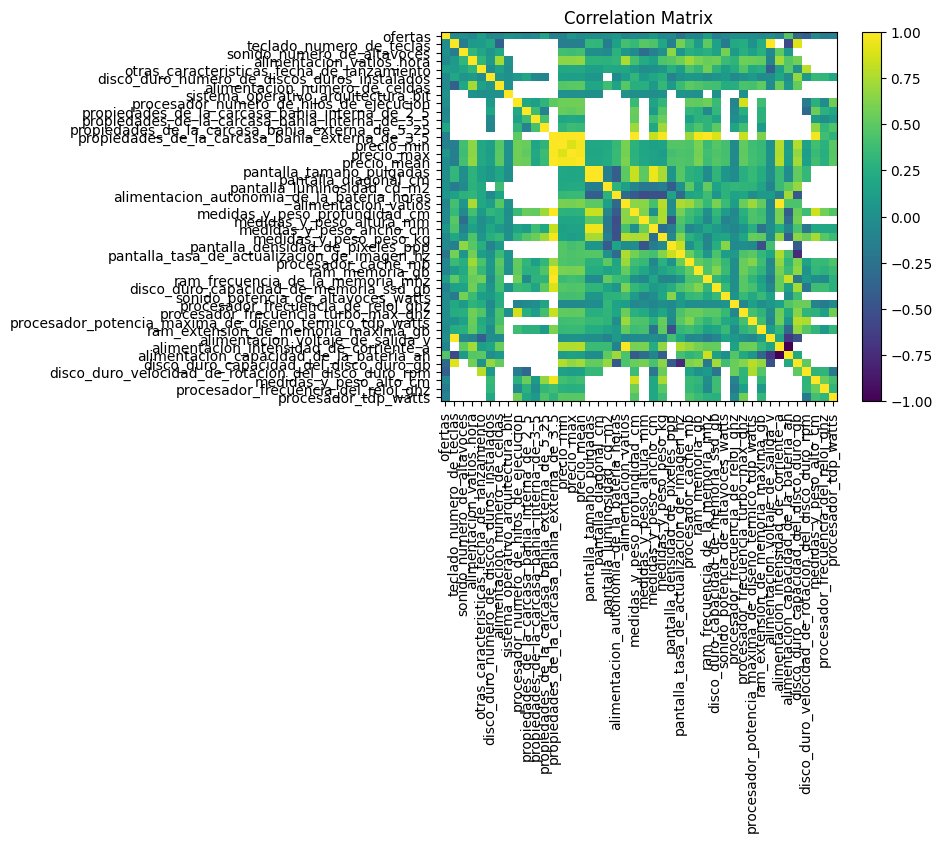

KeyError: 'sistema_operativo'

In [79]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 1. Box Plot of Price by Product Type
plt.figure()
df_copy.boxplot(column='precio_mean', by='tipo_de_producto', rot=90)
plt.title('Price Distribution by Product Type')
plt.suptitle('')
plt.ylabel('Average Price')
plt.show()

# 2. Scatter Plot of Screen Size vs. Price
plt.figure()
plt.scatter(df_copy['pantalla_tamano_pulgadas'], df_copy['precio_mean'])
plt.xlabel('Screen Size (inches)')
plt.ylabel('Average Price')
plt.title('Screen Size vs. Price')
plt.show()

# 3. Box Plot of Price by Series
plt.figure()
df_copy.boxplot(column='precio_mean', by='serie', rot=90)
plt.title('Price Distribution by Series')
plt.suptitle('')
plt.ylabel('Average Price')
plt.show()

# 4. Bar Plot of Top 10 Processors by Average Price
top_procs = df_copy.groupby('procesador_nombre_clave')['precio_mean'].mean().nlargest(10)
plt.figure()
top_procs.plot.bar()
plt.xlabel('Processor')
plt.ylabel('Average Price')
plt.title('Top 10 Processors by Avg. Price')
plt.xticks(rotation=90)
plt.show()

# 5. Heatmap of Correlation Matrix
numeric = df_copy.select_dtypes(include=['int64', 'float64'])
corr = numeric.corr()
plt.figure()
plt.imshow(corr, aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title('Correlation Matrix')
plt.show()

# 6. Violin Plot of Price by Operating System
os_list = df_copy['sistema_operativo'].unique()
data = [df_copy[df_copy['sistema_operativo]'] == os]['precio_mean'].dropna()
        for os in os_list]
plt.figure()
plt.violinplot(data)
plt.xticks(range(1, len(os_list) + 1), os_list, rotation=90)
plt.ylabel('Average Price')
plt.title('Price by Operating System')
plt.show()

# 7. Stacked Bar Plot of Product Types by Brand
pivot = df_copy.pivot_table(index='brand',
                            columns='tipo_de_producto',
                            aggfunc='size', fill_value=0)
plt.figure()
pivot.plot.bar(stacked=True)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Product Type Distribution by Brand')
plt.xticks(rotation=90)
plt.legend(title='Product Type', bbox_to_anchor=(1.05, 1))
plt.show()

# 8. Cluster Plot (PCA + K-Means)
features = numeric.drop(columns=['precio_mean'], errors='ignore').dropna(axis=1)
pca = PCA(n_components=2)
coords = pca.fit_transform(features)
kmeans = KMeans(n_clusters=4)
labels = kmeans.fit_predict(features)

plt.figure()
plt.scatter(coords[:, 0], coords[:, 1], c=labels)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('K-Means Clusters on Key Specs')
plt.show()


## feature selection and dimensionality reduction

- VarianceThreshold removes features that barely vary (i.e., sparse zeros/NaNs).
- Correlation and MI filters each keep only features that demonstrate a minimum relationship (linear or non-linear) with price.
- PCA then compresses the remaining numeric data into a smaller set of orthogonal components explaining 95% of the variance.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import VarianceThreshold, mutual_info_regression
from sklearn.decomposition import PCA

# 0) Parse/ensure a numeric average price column
if df_copy['Precio_Rango'].dtype == object:
    pr = (df_copy['Precio_Rango']
          .astype(str)
          .str.replace('€','', regex=False)
          .str.replace('\xa0','', regex=False)
          .str.replace(' ','', regex=False))
    minmax = pr.str.split('–', expand=True)
    df_copy['Precio_min'] = pd.to_numeric(minmax[0]
                                         .str.replace('.','', regex=False)
                                         .str.replace(',','.', regex=False),
                                         errors='coerce')
    df_copy['Precio_max'] = pd.to_numeric(minmax[1]
                                         .str.replace('.','', regex=False)
                                         .str.replace(',','.', regex=False),
                                         errors='coerce')
    df_copy['Precio_avg'] = df_copy[['Precio_min','Precio_max']].mean(axis=1)

# 1) Target vector
y = df_copy['Precio_avg'].fillna(df_copy['Precio_avg'].median())

# 2) Numeric feature matrix (drop the new price cols)
X_num = (df_copy
         .select_dtypes(include=[np.number])
         .drop(columns=['Precio_min','Precio_max','Precio_avg'], errors='ignore')
         .fillna(0))

# ---- 2a) Variance Threshold ----
vt = VarianceThreshold(threshold=0.01)
vt.fit(X_num)
sel_vt = X_num.columns[vt.get_support()]
print("VarianceThreshold kept:", len(sel_vt), "features")

# ---- 2b) Correlation Filter ----
corr = X_num.corrwith(y).abs()
sel_corr = corr[corr > 0.1].index
print("Correlation filter kept:", len(sel_corr), "features")

# ---- 2c) Mutual Information Filter ----
mi = mutual_info_regression(X_num, y)
mi_series = pd.Series(mi, index=X_num.columns).sort_values(ascending=False)
sel_mi = mi_series[mi_series > 0.01].index
print("Mutual Information filter kept:", len(sel_mi), "features")

# ---- 3) PCA (95% variance) ----
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_num)
print("PCA output shape:", X_pca.shape)


## Dataset Splitting

### Split by Category

In [ ]:
df['tipo_de_producto'].unique()

Because different "Tipo de producto" has extremely different properties, it will be beneficial to split the dataset into different csv files. This will help us will object and schema managemnet when storing and querying for items in the database.

### Split by 'Tipo De Producto'

In [ ]:
unique_product_types = df['tipo_de_producto'].unique()
dfs_by_product_type = {}

for product_type in unique_product_types:
    if pd.isna(product_type): 
        subset_df = df[df['tipo_de_producto'].isna()].copy() 
        subset_df.dropna(axis=1, how='all', inplace=True) # Clean it too
        dfs_by_product_type['Desconocido'] = subset_df 
        print(f"Processed 'Desconocido': original columns {df[df['tipo_de_producto'].isna()].shape[1]}, cleaned columns {subset_df.shape[1]}")
    else:
        subset_df = df[df['tipo_de_producto'] == product_type].copy()
        original_cols = subset_df.shape[1]
        # Drop columns where ALL values are NaN
        subset_df.dropna(axis=1, how='all', inplace=True) 
        cleaned_cols = subset_df.shape[1]
        dfs_by_product_type[product_type] = subset_df
        print(f"Processed '{product_type}': original columns {original_cols}, cleaned columns {cleaned_cols}")


In [ ]:
import os

output_data_path = '../data/split_by_type/' 
if not os.path.exists(output_data_path):
    os.makedirs(output_data_path)

# The dfs_by_product_type dictionary now holds the cleaned DataFrames
for product_type, df_cleaned_subset in dfs_by_product_type.items():
    filename_safe_product_type = "".join(c if c.isalnum() else "_" for c in str(product_type))
    file_path = os.path.join(output_data_path, f"{filename_safe_product_type}.csv")
    df_cleaned_subset.to_csv(file_path, index=False)
    print(f"Saved cleaned data to: {file_path}")


In [ ]:
# Example mapping:
category_map = {
    'Portátil multimedia': 'Laptop', 'Portátil gaming': 'Laptop', 
    'Portátil profesional': 'Laptop', 'Ultrabook': 'Laptop',
    'Portátil convertible': 'Laptop', 'Netbook': 'Laptop',
    'Portátil 3D': 'Laptop', 'Chromebook': 'Laptop',

    'Mini PC': 'Desktop_PC', 'PC multimedia': 'Desktop_PC', 
    'PC gaming': 'Desktop_PC', 'PC de oficina': 'Desktop_PC',
    'Workstation': 'Desktop_PC', 'Barebone': 'Desktop_PC', 
    'PC completo': 'Desktop_PC',

    'Kit ampliación PC': 'Component_Kit',
    'Thin Client': 'Specialized_PC', 
}

In [ ]:
df['Categoria_General'] = df['tipo_de_producto'].map(category_map)
# Handle any types not in your map, perhaps by assigning them to 'Other'
df['Categoria_General'].fillna('Otro', inplace=True) 

In [ ]:
dfs_by_general_category = {}
for general_category_name in df['Categoria_General'].unique():
    subset_df = df[df['Categoria_General'] == general_category_name].copy()
    # IMPORTANT: Drop all-NaN columns again for these new broader DFs
    subset_df.dropna(axis=1, how='all', inplace=True)
    dfs_by_general_category[general_category_name] = subset_df
    
    # Save these new broader category DataFrames to new CSVs
    # (You'll want a new output folder or different filenames)
    output_path_general = '../data/split_by_general_category/'
    if not os.path.exists(output_path_general):
        os.makedirs(output_path_general)
    
    filename_safe_general_category = "".join(c if c.isalnum() else "_" for c in str(general_category_name))
    file_path = os.path.join(output_path_general, f"{filename_safe_general_category}.csv")
    subset_df.to_csv(file_path, index=False)
    print(f"Saved cleaned data to: {file_path} (Rows: {len(subset_df)}, Columns: {subset_df.shape[1]})")

In [ ]:
df.head()

## Validation & Consistency Checks